# Cluster model (K-means)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Dropping-duplicate-index-column" data-toc-modified-id="Dropping-duplicate-index-column-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping duplicate index column</a></span></li><li><span><a href="#Reducing-number-of-items-in-brand-column" data-toc-modified-id="Reducing-number-of-items-in-brand-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reducing number of items in brand column</a></span></li><li><span><a href="#Get-dummies-for-brand-column" data-toc-modified-id="Get-dummies-for-brand-column-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get dummies for brand column</a></span></li><li><span><a href="#New-dataframe-(numerical-columns-only)" data-toc-modified-id="New-dataframe-(numerical-columns-only)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New dataframe (numerical columns only)</a></span></li><li><span><a href="#Dealing-with-null-values" data-toc-modified-id="Dealing-with-null-values-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with null values</a></span></li><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Scaling the data</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#First-run-(k=3)" data-toc-modified-id="First-run-(k=3)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First run (k=3)</a></span></li><li><span><a href="#Chosing-the-best-k" data-toc-modified-id="Chosing-the-best-k-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Chosing the best k</a></span></li><li><span><a href="#Silhouette-score" data-toc-modified-id="Silhouette-score-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Silhouette score</a></span></li><li><span><a href="#Final-model-(k=8)" data-toc-modified-id="Final-model-(k=8)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Final model (k=8)</a></span></li></ul></li></ul></div>

## Libraries

In [1]:
from fuzzywuzzy import process

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Importing the data

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
df.shape

(1232, 16)

In [4]:
df.head()

,Unnamed: 0,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link
0,0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...
1,1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...
2,2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...
3,3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...
4,4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...


## Preprocessing the data

### Dropping duplicate index column

In [5]:
df = df.drop('Unnamed: 0', axis=1)

### Reducing number of items in brand column

In [6]:
pd.set_option('display.max_rows', 20)

In [7]:
brand_count = pd.DataFrame(df['brand'].value_counts()).reset_index()
brand_count

,index,brand
0,Koro,221
1,Foodist,96
2,mind sweets,40
3,Plamil,30
4,Heimatgut,29
...,...,...
99,Liebhart's,1
100,Biolandhof Klein,1
101,Lord of Tofu,1
102,Céliane,1


In [8]:
keep_brands = brand_count['index'][brand_count['brand']>10].to_list()

In [9]:
len(keep_brands)

34

In [10]:
def clean_brand(col, lst_brands=[]):
    
    brand_new = []
    
    for p in col:
        if p not in lst_brands:
            brand_new.append('Other')
        else:
            brand_new.append(p)
    
    return brand_new

In [11]:
df['brand_new'] = clean_brand(df['brand'], lst_brands=keep_brands)
df['brand_new'].value_counts()

Other               338
Koro                221
Foodist              96
mind sweets          40
Plamil               30
                   ... 
Bernsteinzimmer      12
Dörrwerk             12
Wally & Whiz         12
Vantastic Foods      11
rosmarin BIOBACK     11
Name: brand_new, Length: 35, dtype: int64

### Get dummies for brand column

In [12]:
df_new = pd.get_dummies(df, columns=['brand_new'])
df_new.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,...,0,0,0,0,0,0,0,0,0,0
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,...,0,0,0,0,0,0,0,0,0,0


### New dataframe (numerical columns only)

In [13]:
df_model = df_new.select_dtypes(np.number)

In [14]:
df_model.head()

,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,...,0,0,0,0,0,0,0,0,0,0
4,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with null values

In [15]:
df_model.isna().sum().sort_values(ascending=False)

fibre                     707
salt                       83
protein                    15
fat                        13
sat_fat                    13
                         ... 
brand_new_Landgarten        0
brand_new_Lini's Bites      0
brand_new_Lovechock         0
brand_new_MYLKCHOCY         0
brand_new_ÖKOVITAL          0
Length: 46, dtype: int64

In [16]:
def per_NaN_columns(df):
    nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage_nulls'])
    nulls = nulls.sort_values('percentage_nulls', ascending = False)
    return nulls

In [17]:
nulls = per_NaN_columns(df_model)
nulls

,percentage_nulls
fibre,57.386364
salt,6.737013
protein,1.217532
fat,1.055195
sat_fat,1.055195
...,...
brand_new_Landgarten,0.000000
brand_new_Lini's Bites,0.000000
brand_new_Lovechock,0.000000
brand_new_MYLKCHOCY,0.000000


**Conclusion:**
- the percentage of null-values for fibre is too high = column will be dropped
- all other null-values will be replaced by the mean of the column

In [18]:
def fill_NaN(df):
    for col in df:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)    
    return df

In [19]:
df_model = fill_NaN(df_model)

In [20]:
df_model.isna().sum().sort_values(ascending=False)

price                            0
brand_new_Taste of Nature        0
brand_new_Moo Free               0
brand_new_N.A! Nature Addicts    0
brand_new_Naturata               0
                                ..
brand_new_Green & More           0
brand_new_Heimatgut              0
brand_new_Koro                   0
brand_new_Landgarten             0
brand_new_ÖKOVITAL               0
Length: 46, dtype: int64

### Dealing with outliers

In [21]:
def showing_dist_box(df):
   
    for col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        # sns.set_style("darkgrid")

        sns.distplot(df[col], ax=axes[0])
        sns.boxplot(df[col], ax=axes[1])
        
        plt.show()

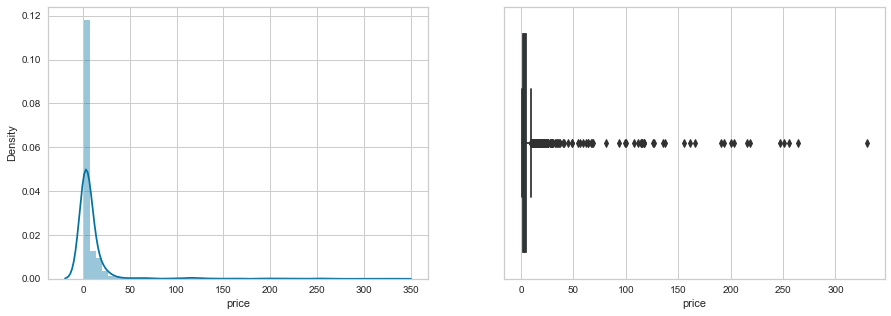

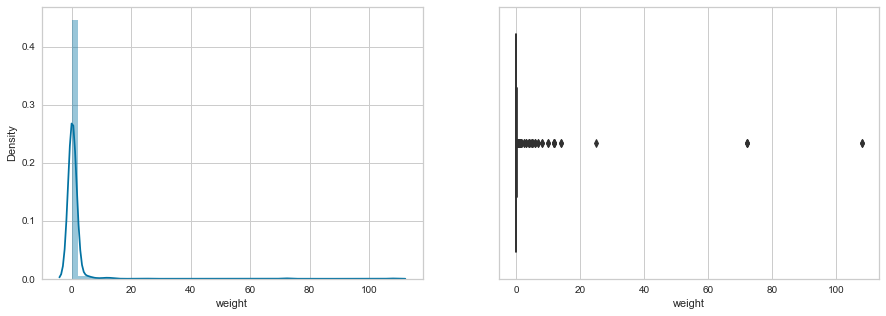

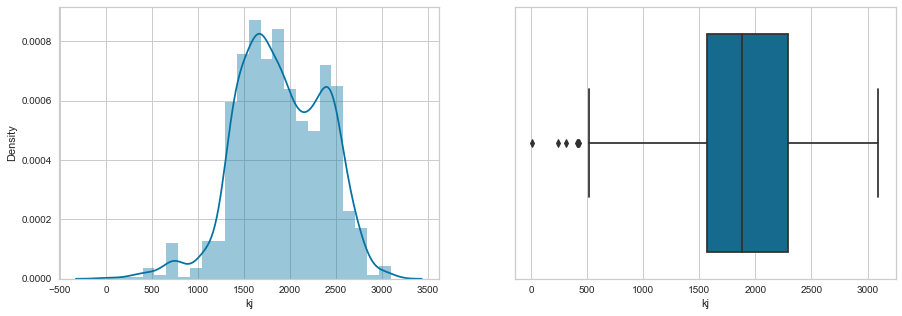

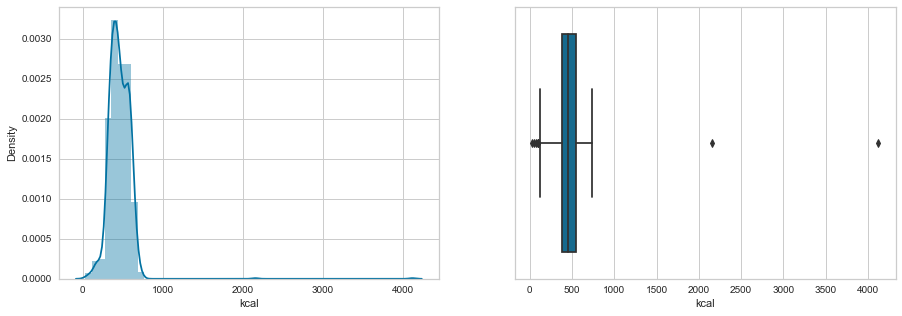

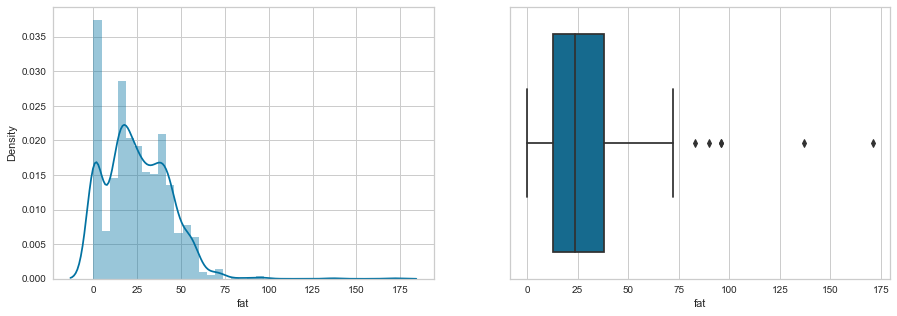

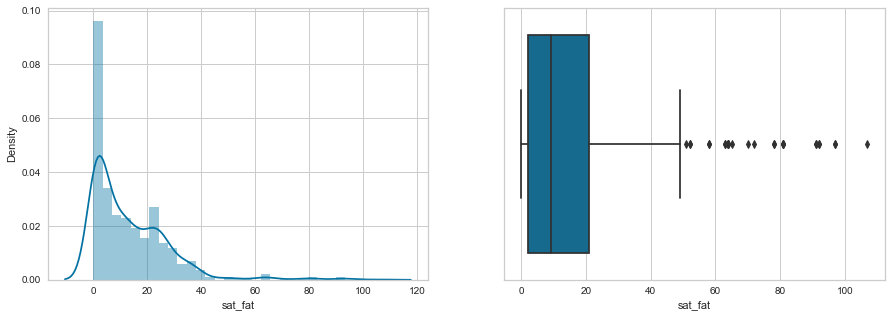

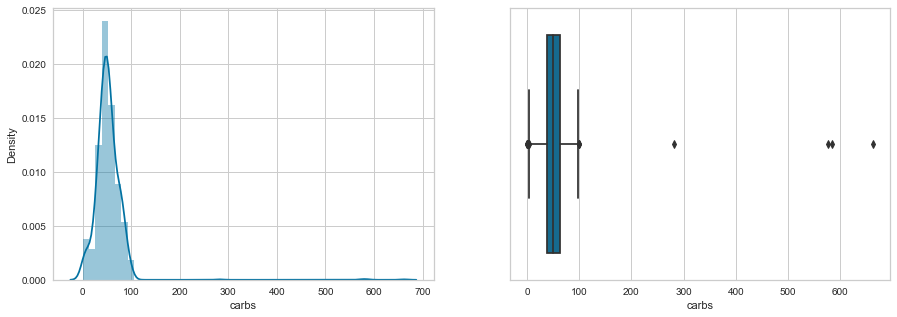

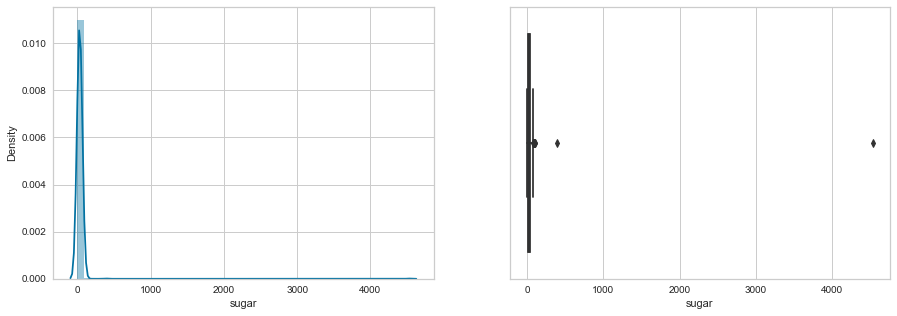

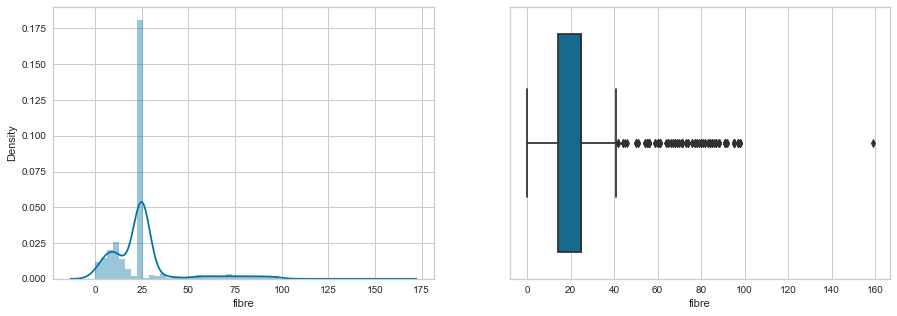

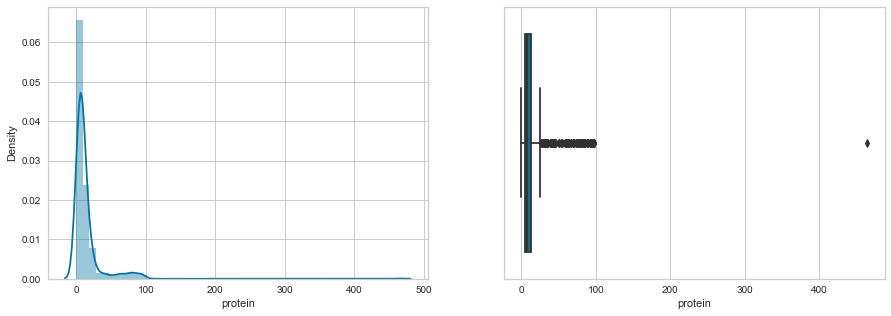

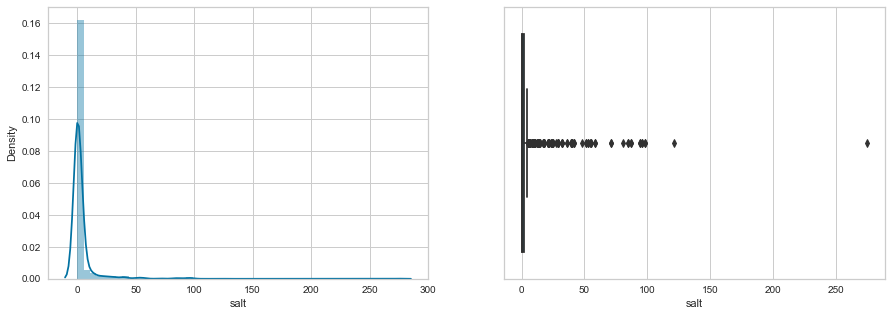

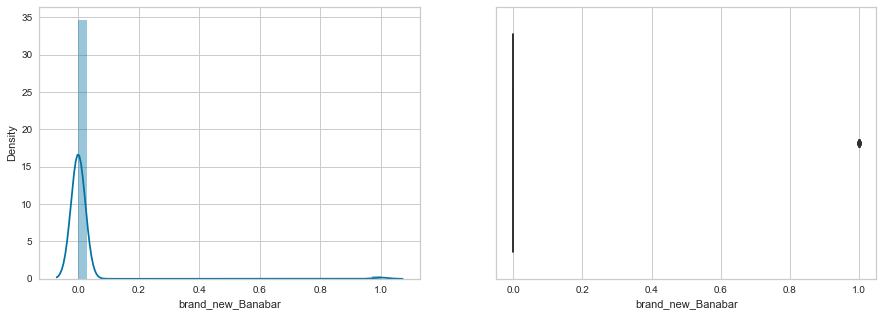

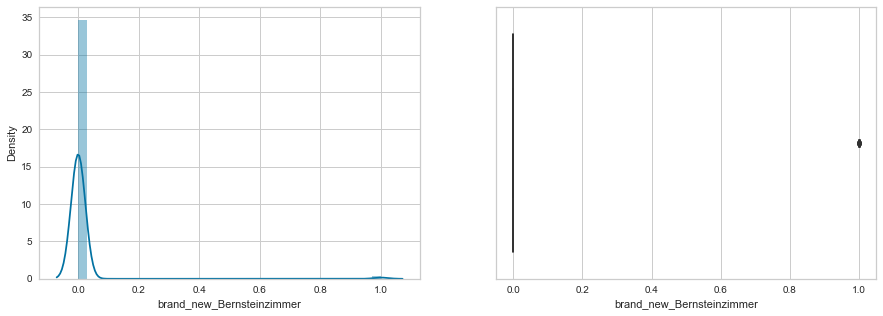

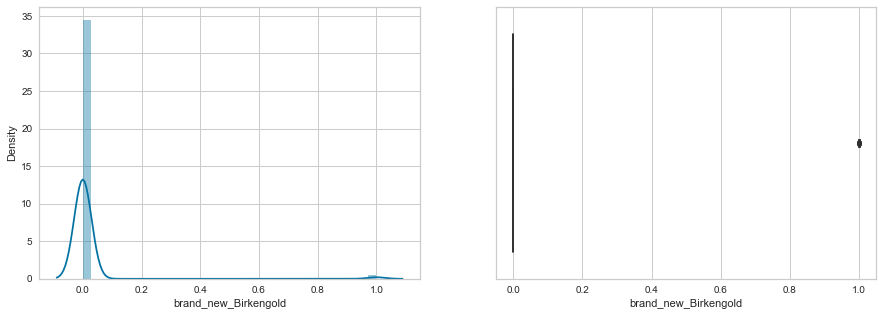

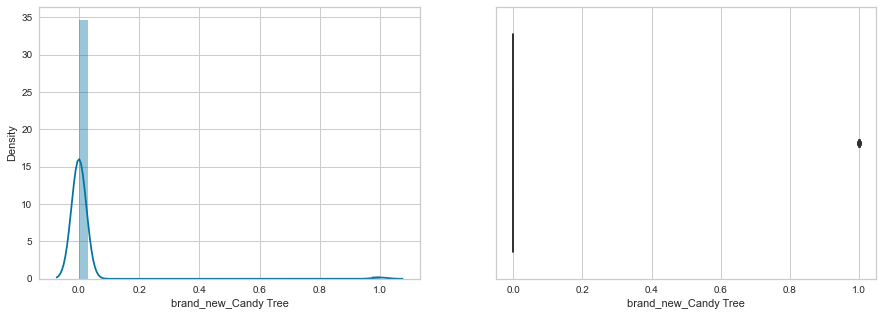

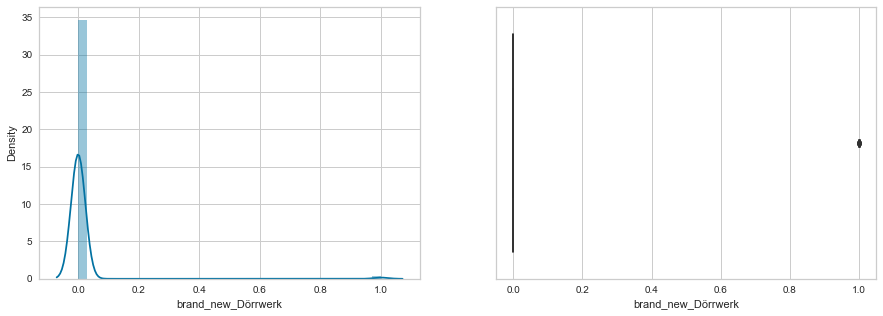

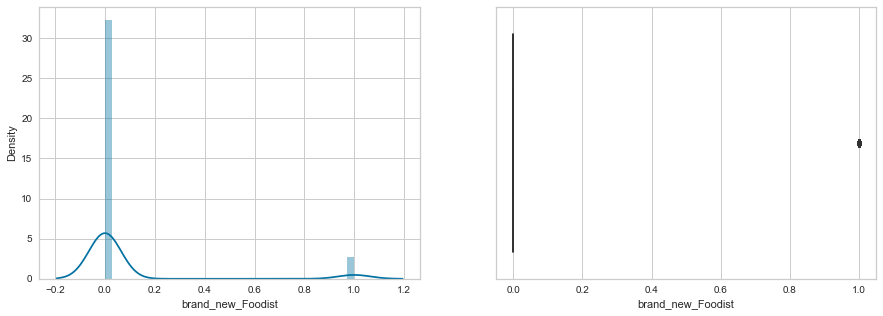

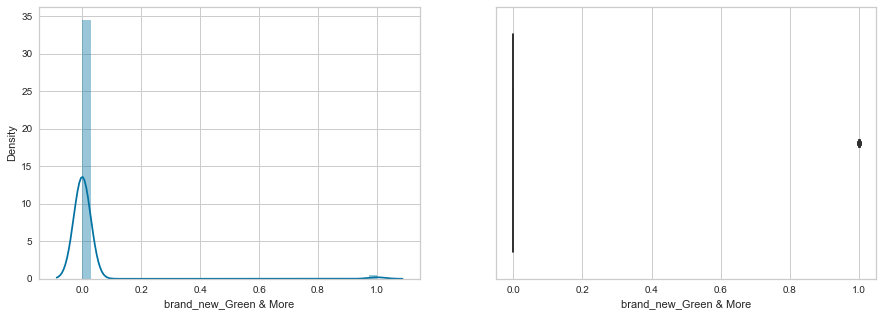

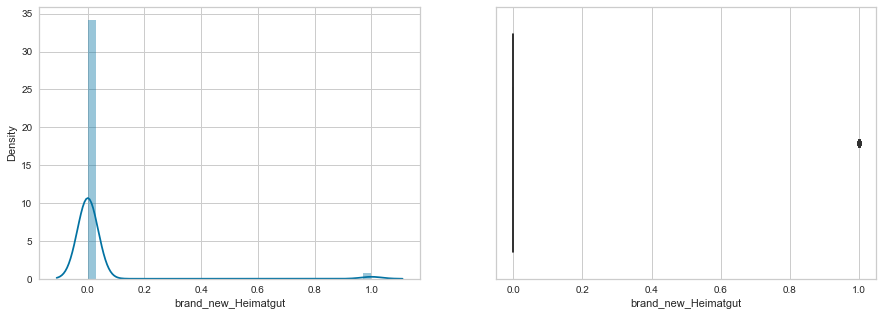

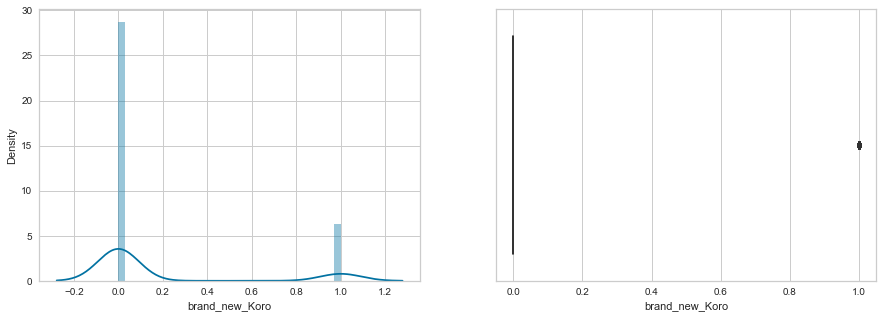

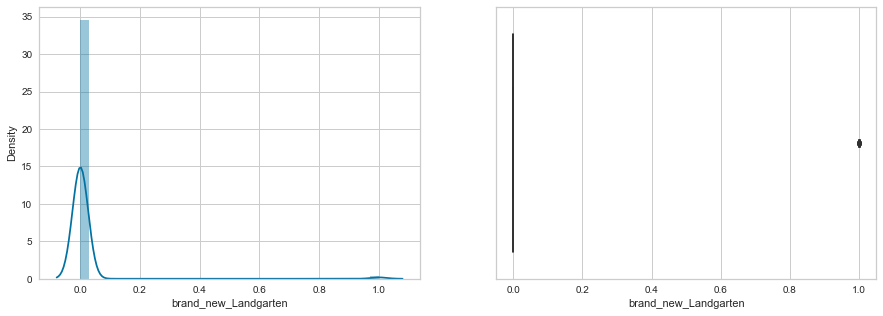

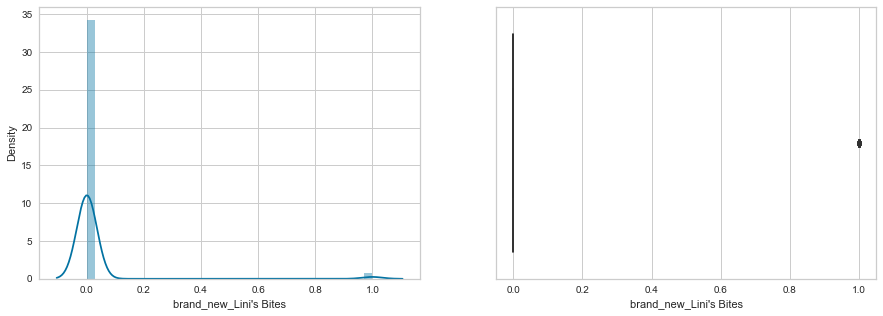

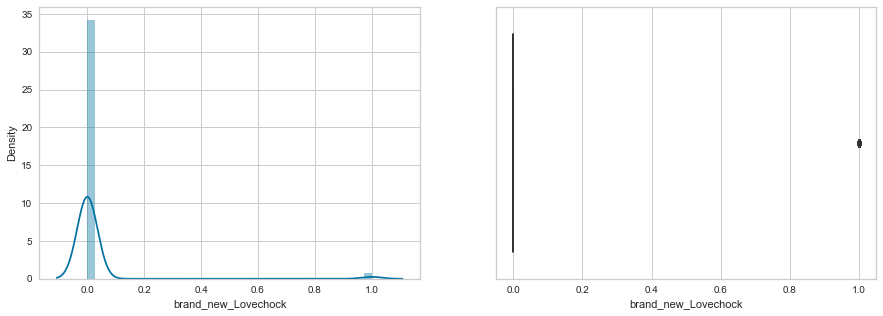

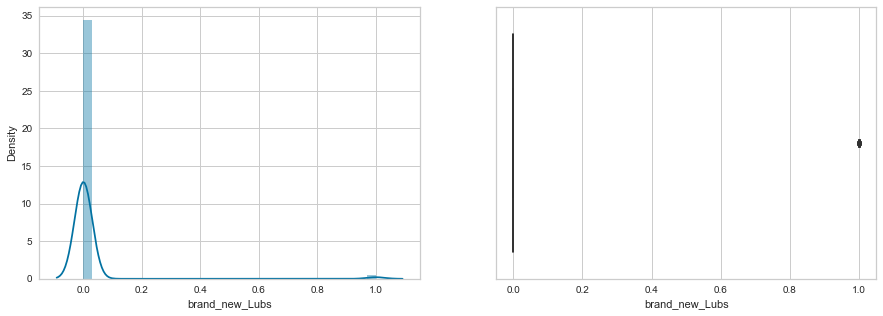

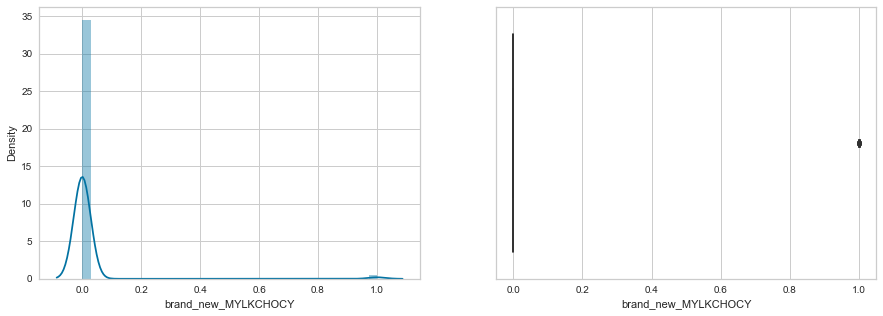

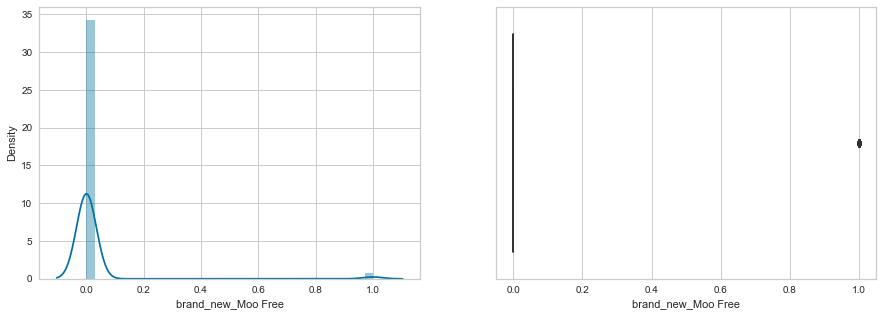

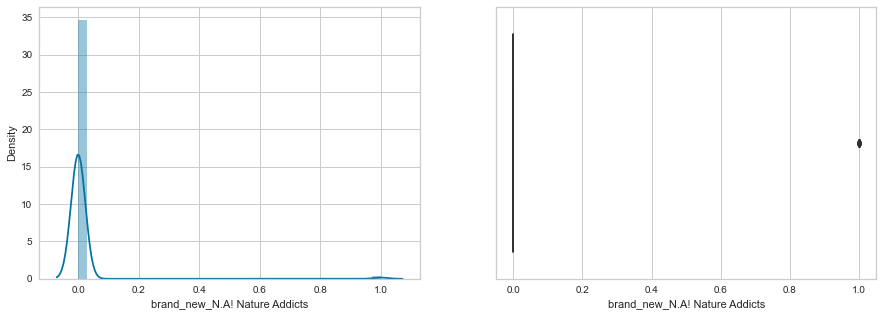

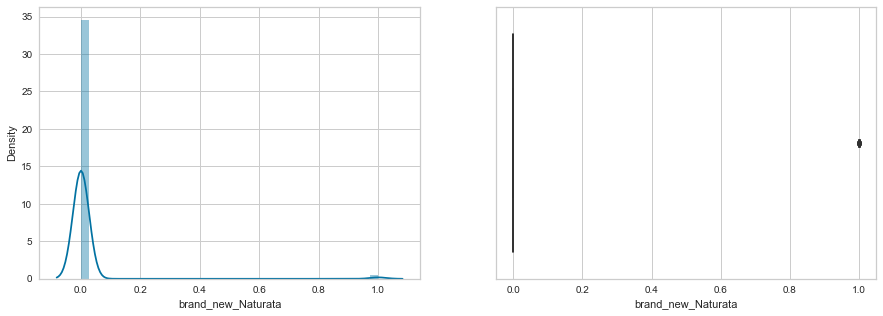

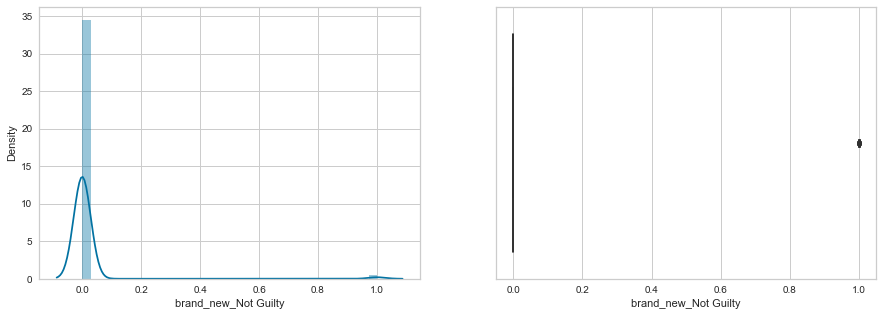

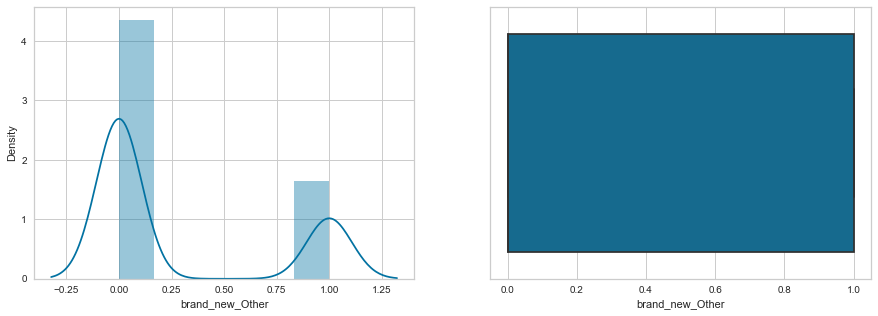

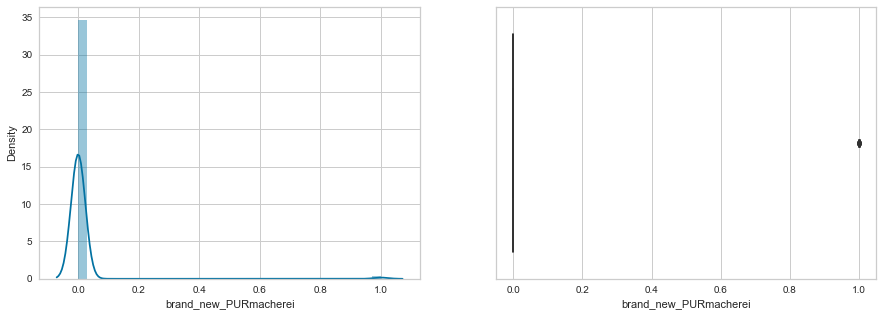

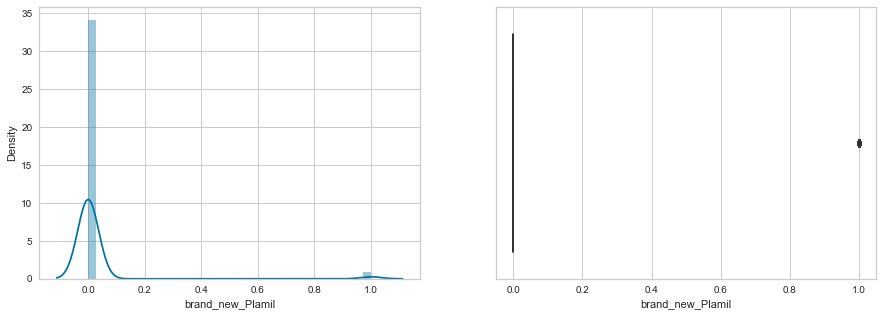

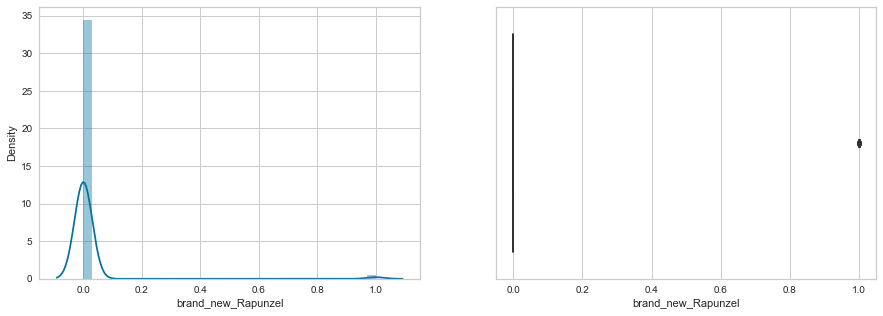

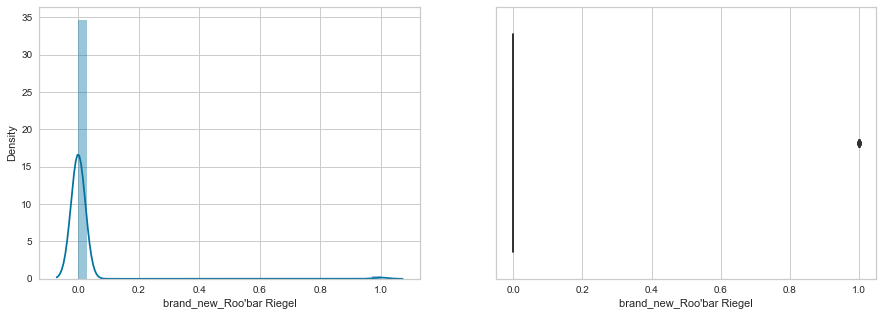

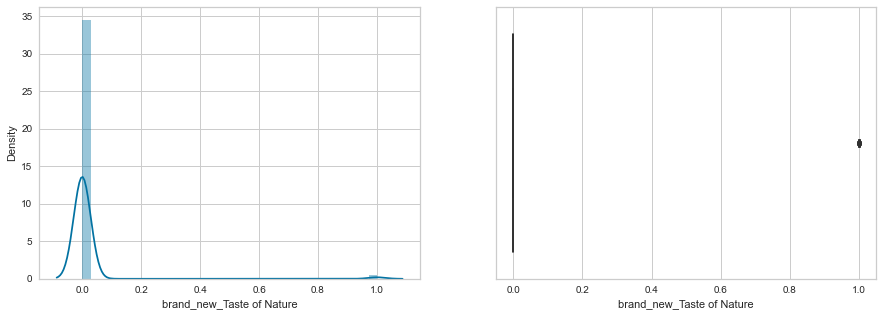

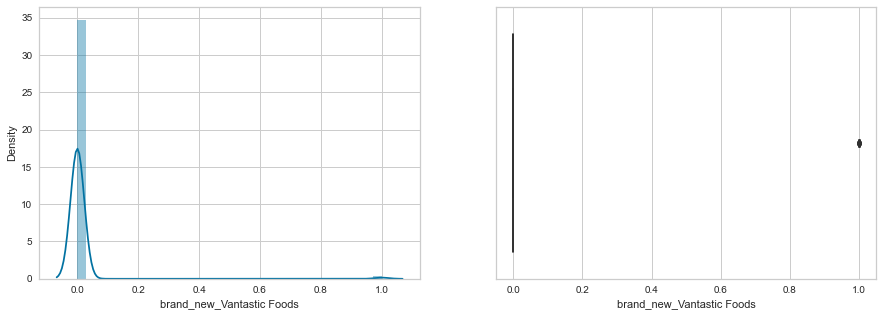

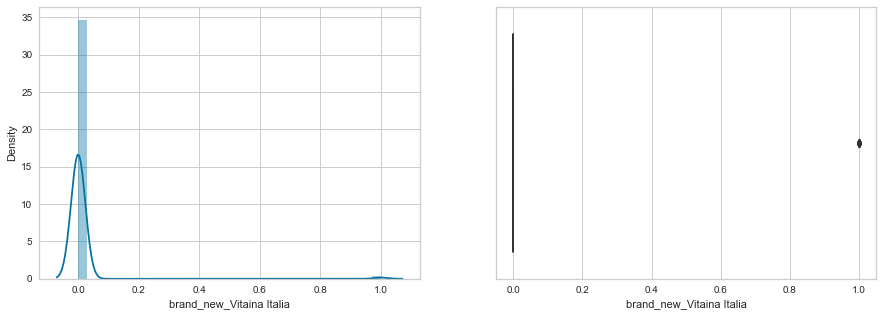

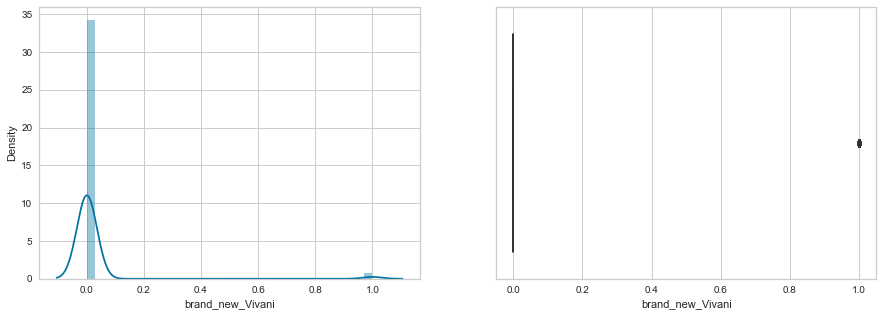

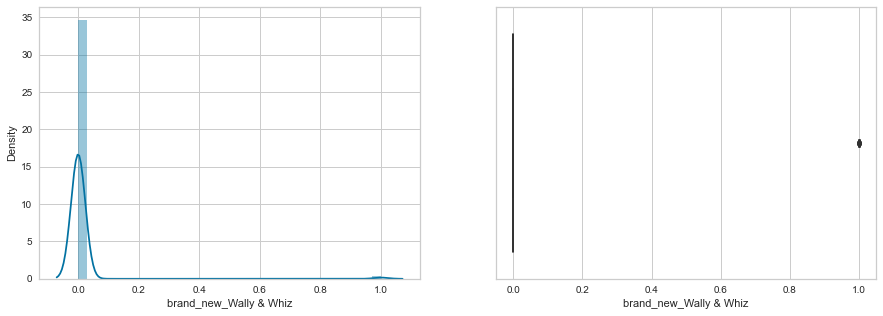

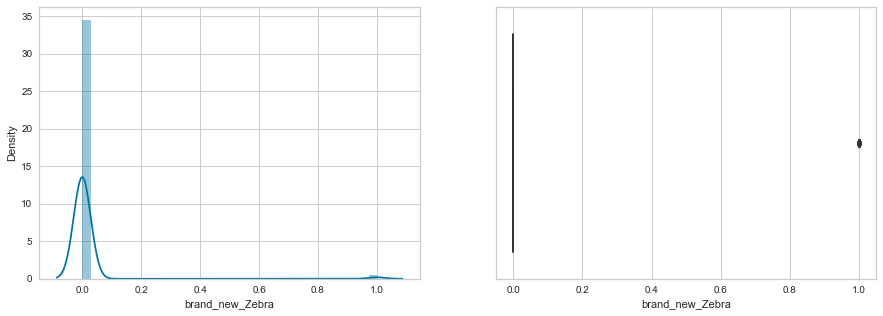

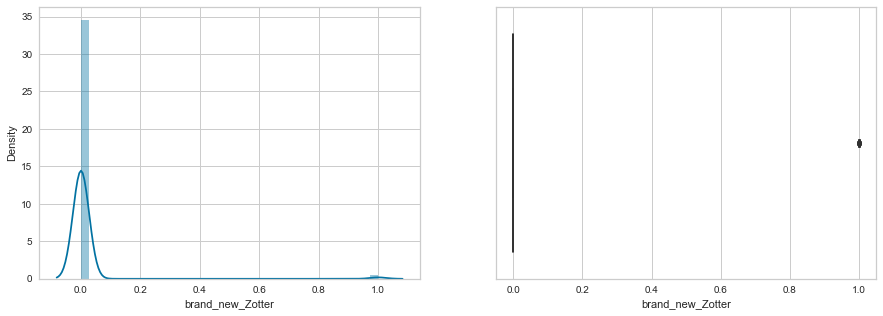

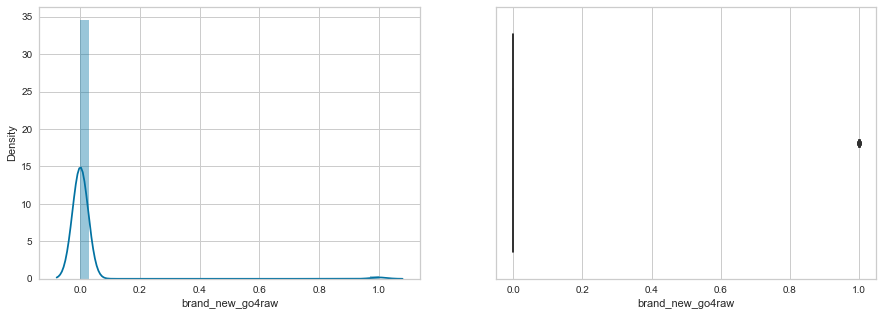

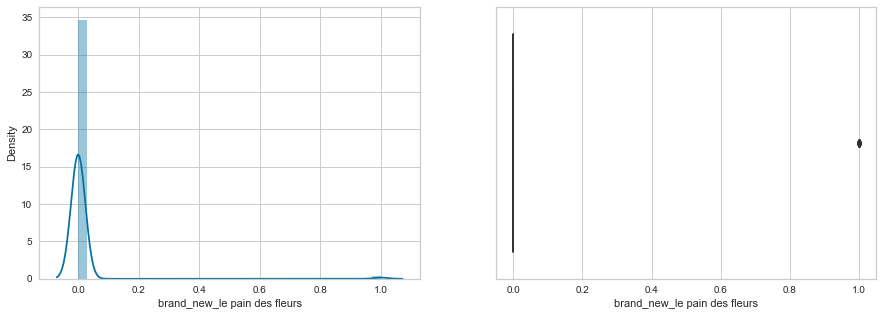

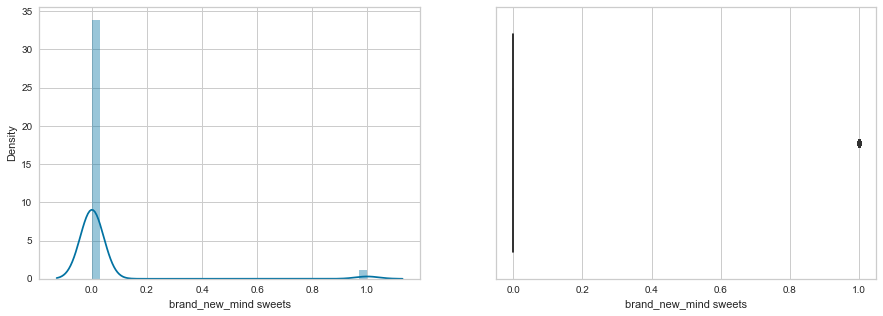

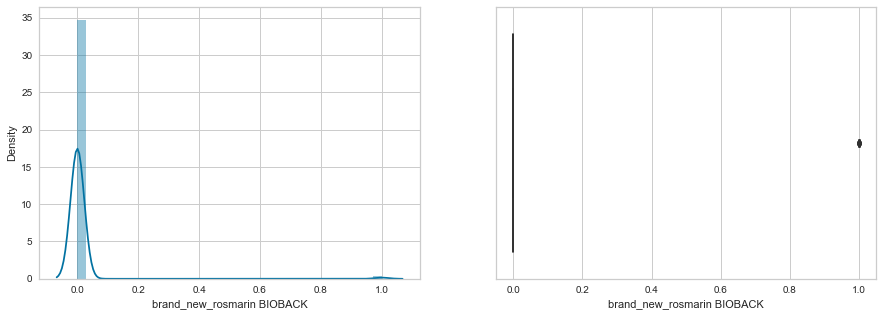

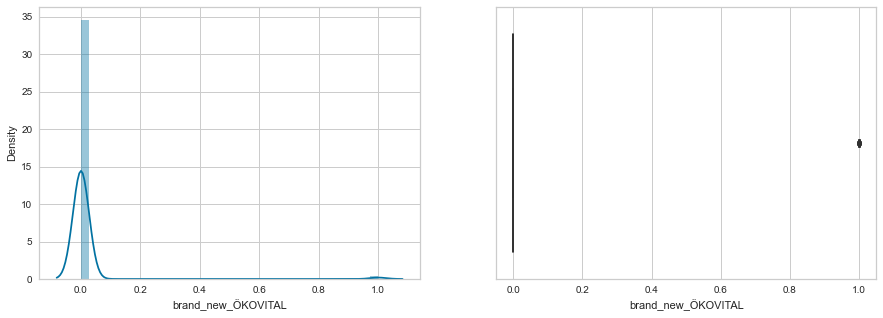

In [22]:
showing_dist_box(df_model)

In [23]:
df_model.columns

Index(['price', 'weight', 'kj', 'kcal', 'fat', 'sat_fat', 'carbs', 'sugar',
       'fibre', 'protein', 'salt', 'brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', 'brand_new_Lini's Bites', 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', 'brand_new_Roo'bar Riegel',
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_ro

In [24]:
def cutting_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df.loc[df[column] > upper_limit, column] = upper_limit
            df.loc[df[column] < lower_limit, column] = lower_limit
    return df

In [25]:
in_col = ['price', 'weight', 'kj', 'kcal', 'fat', 'sat_fat', 'carbs', 'sugar',
       'fibre', 'protein', 'salt']

skip_col = ['brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', "brand_new_Lini's Bites", 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', "brand_new_Roo'bar Riegel",
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',
       'brand_new_ÖKOVITAL']

df_model = cutting_outliers(df_model, threshold=1.5, in_columns=in_col, skip_columns=skip_col)

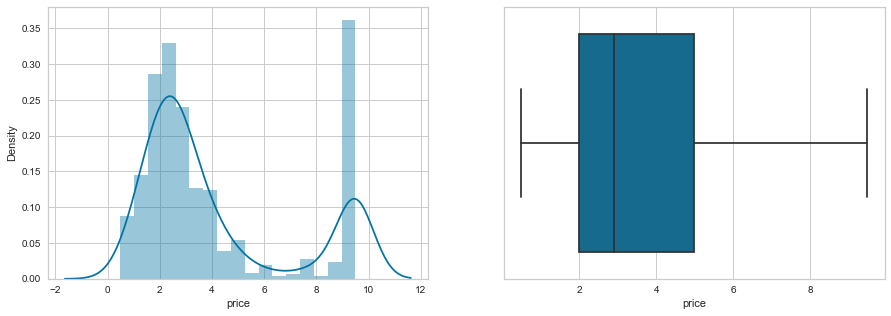

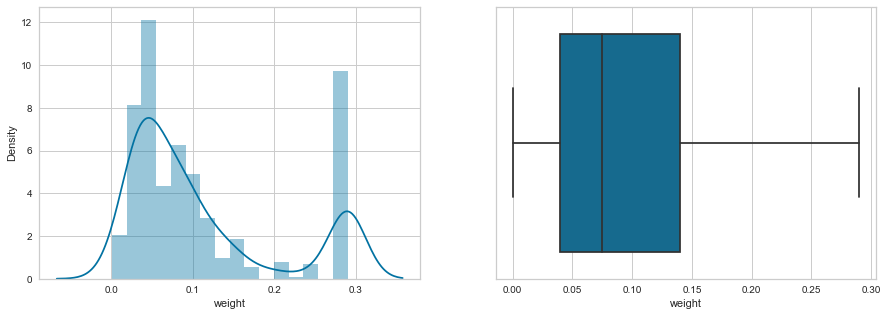

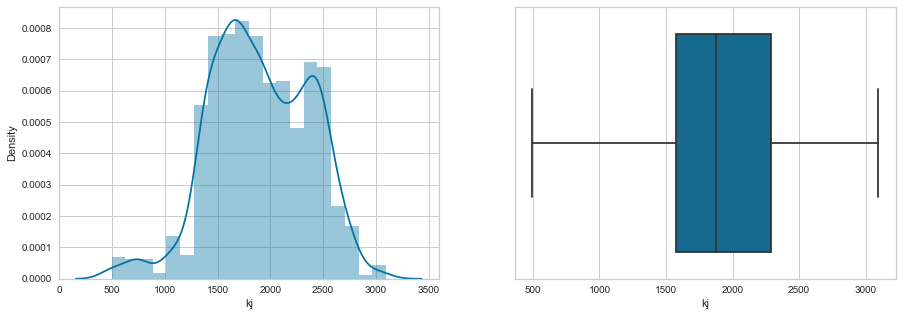

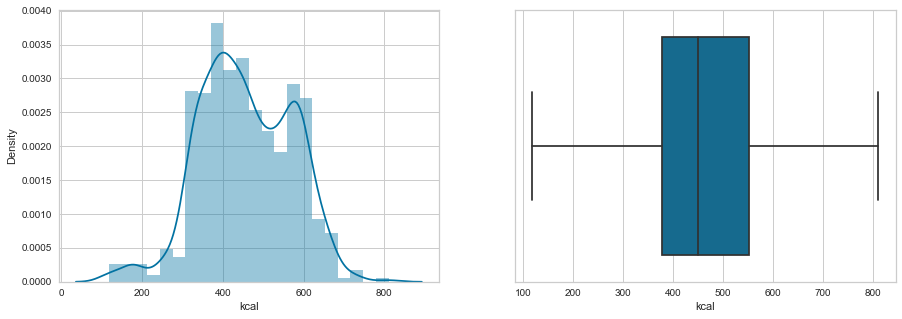

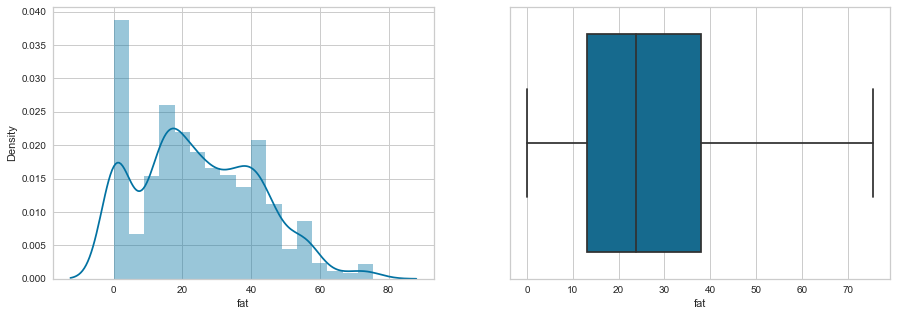

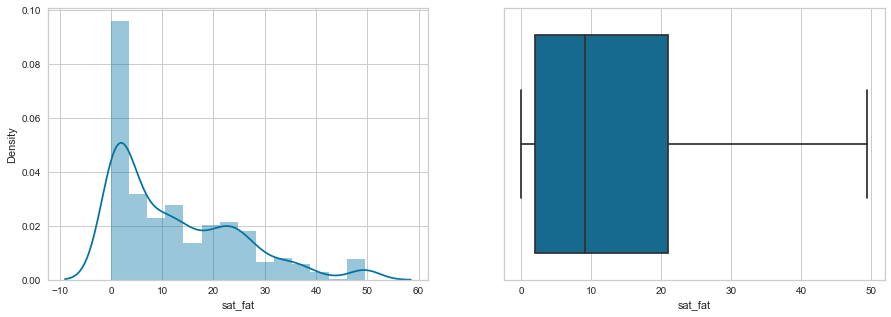

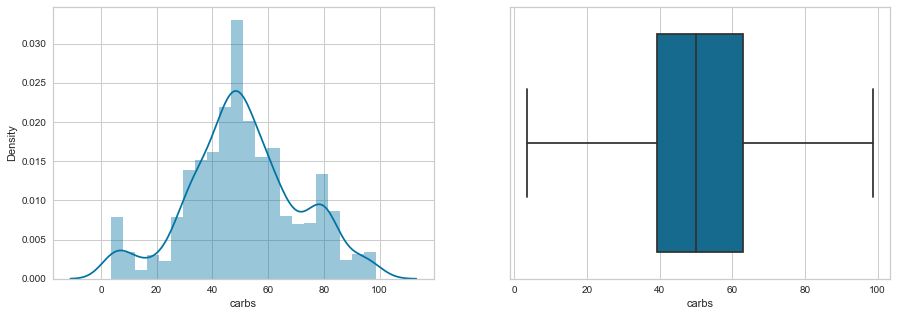

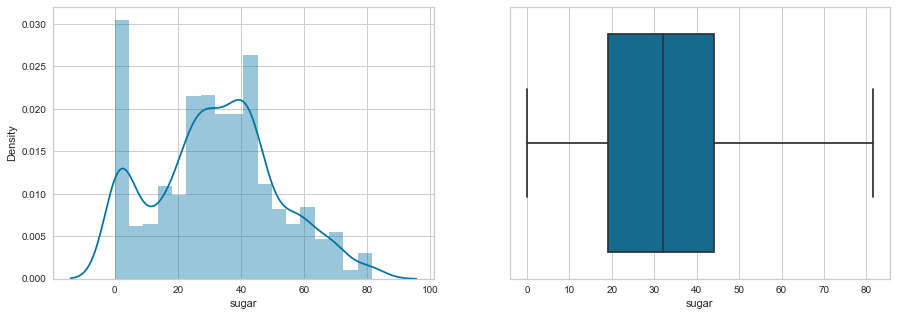

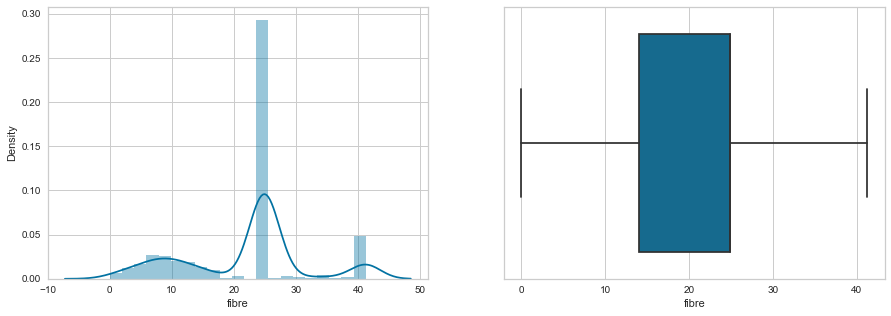

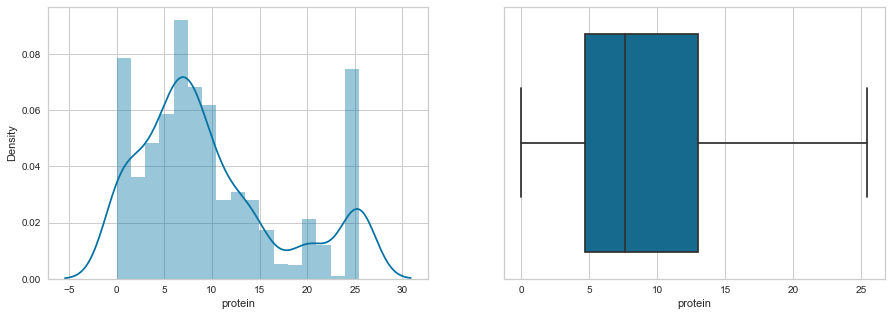

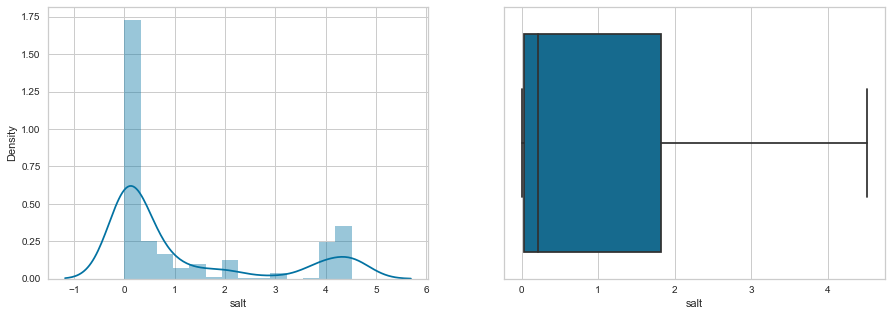

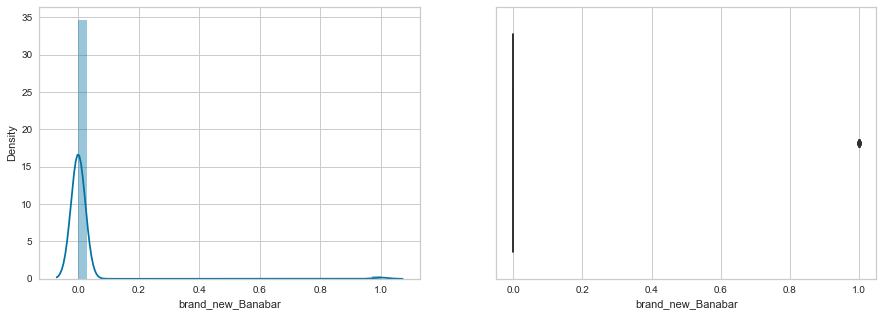

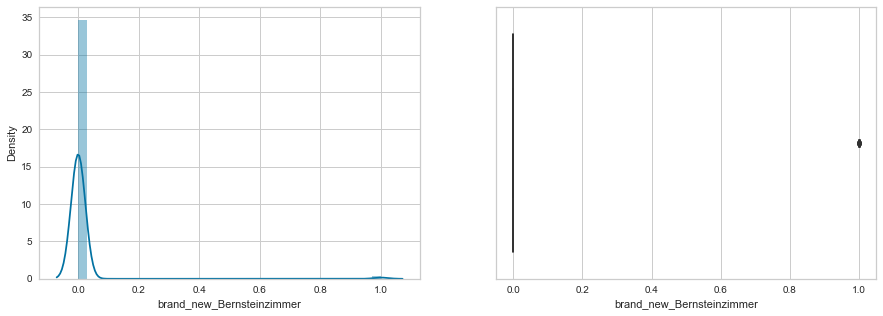

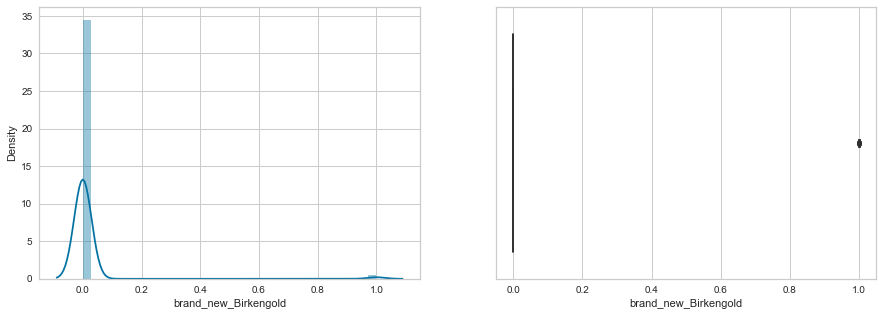

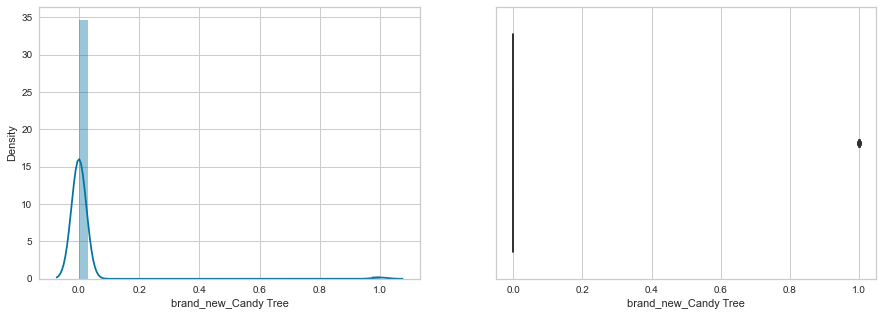

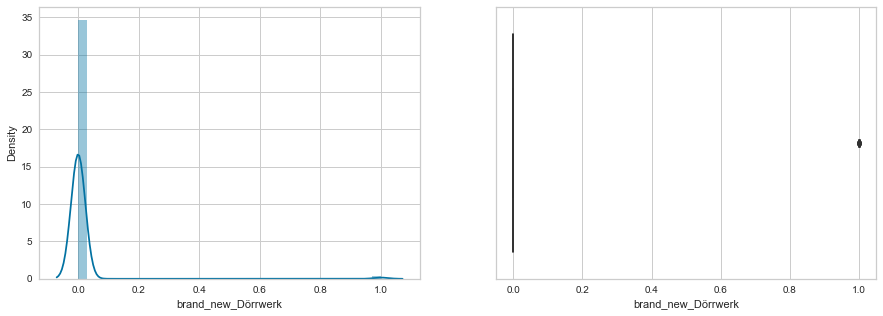

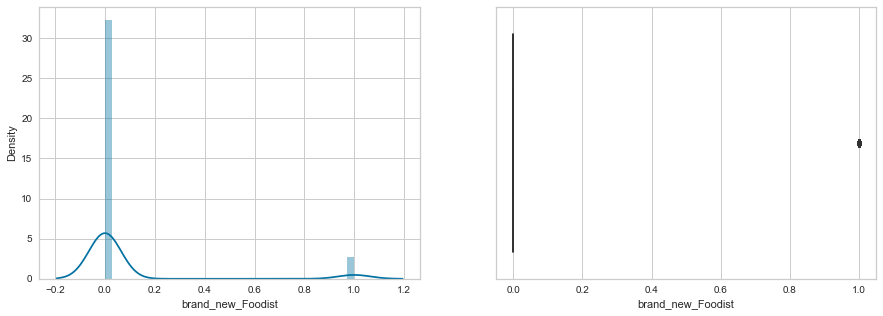

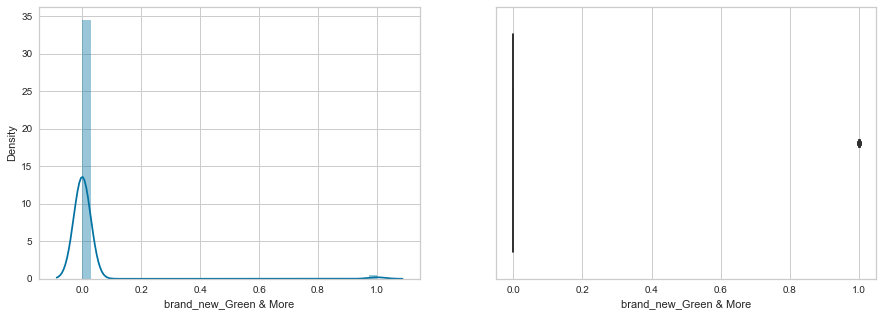

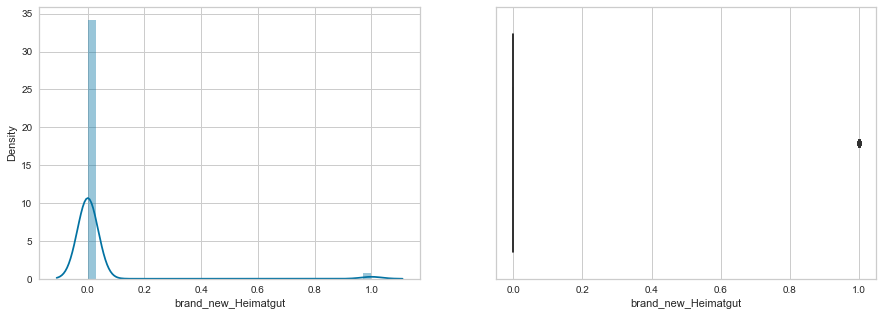

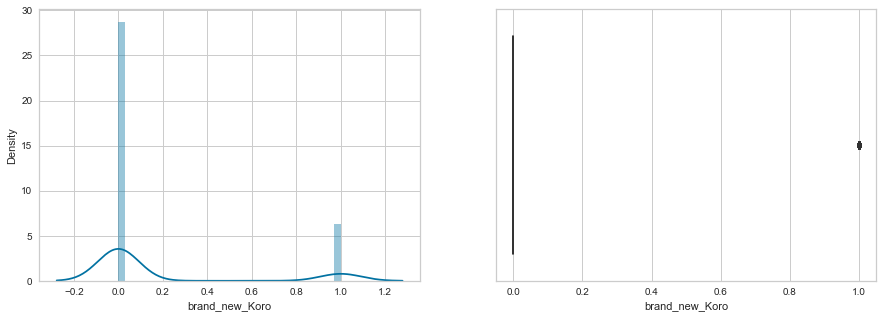

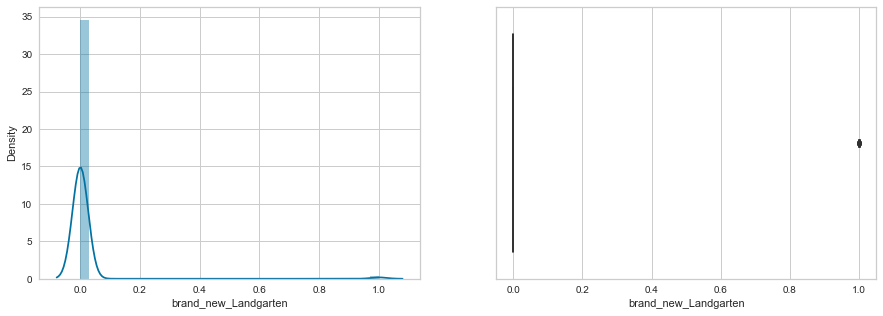

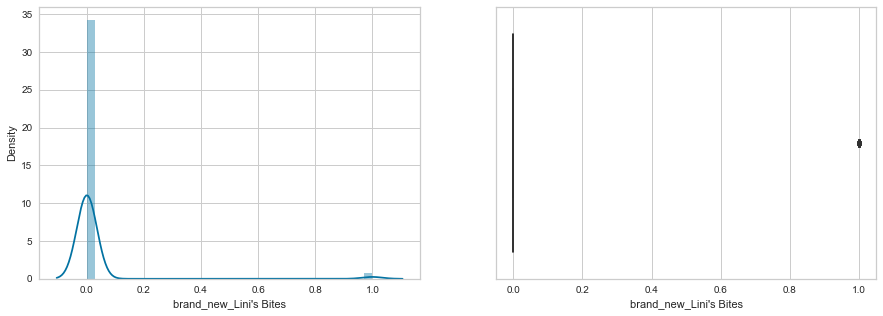

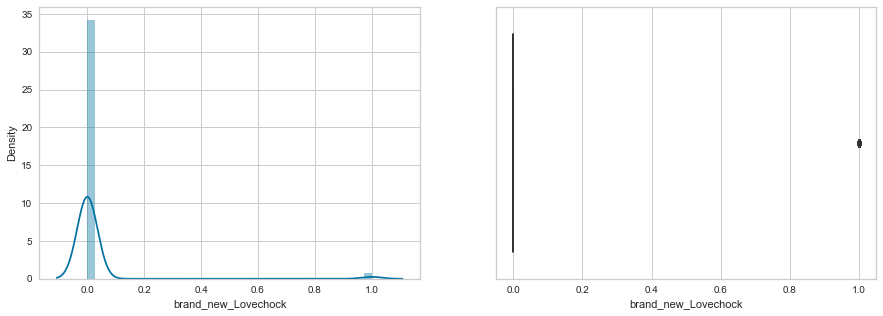

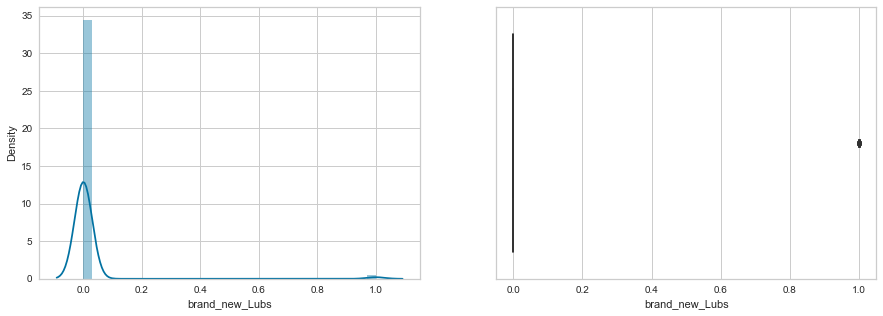

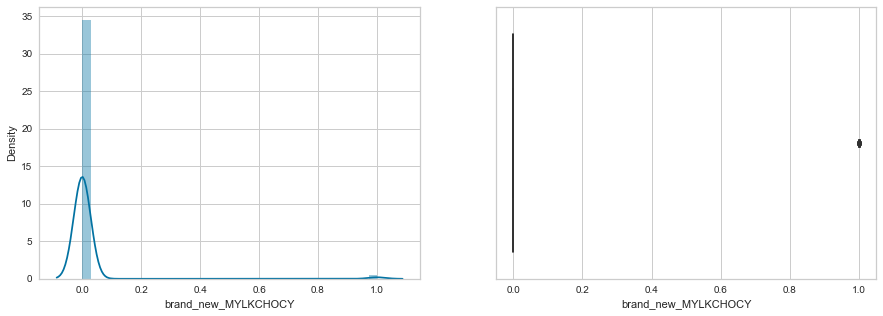

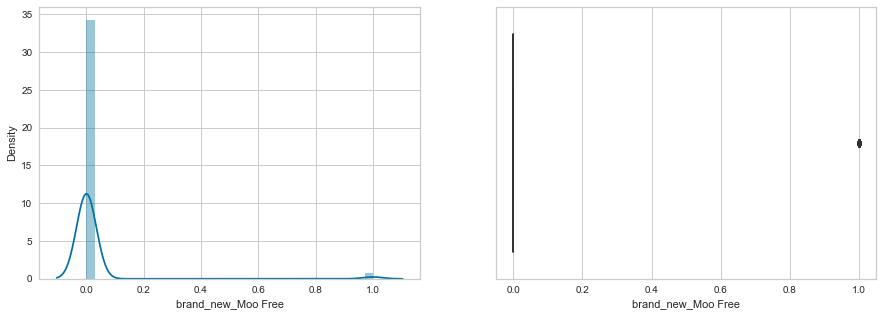

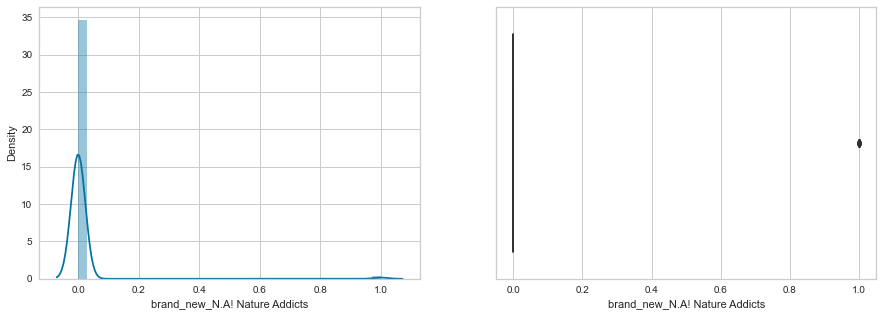

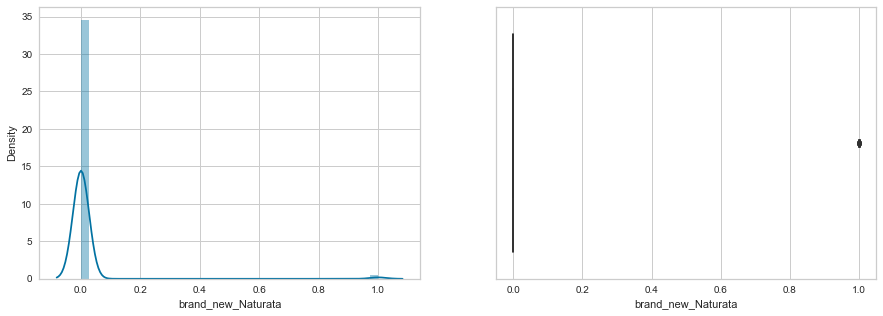

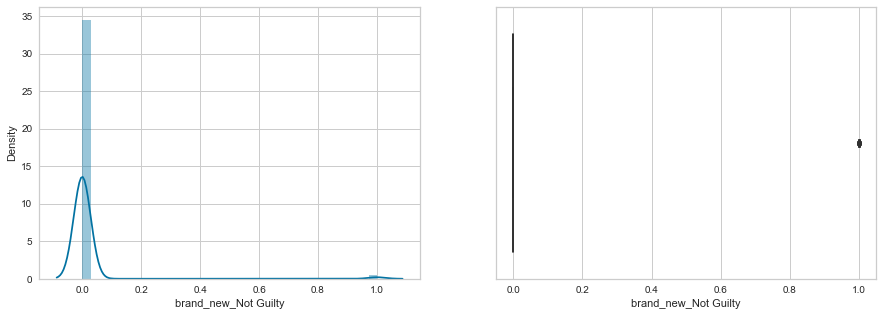

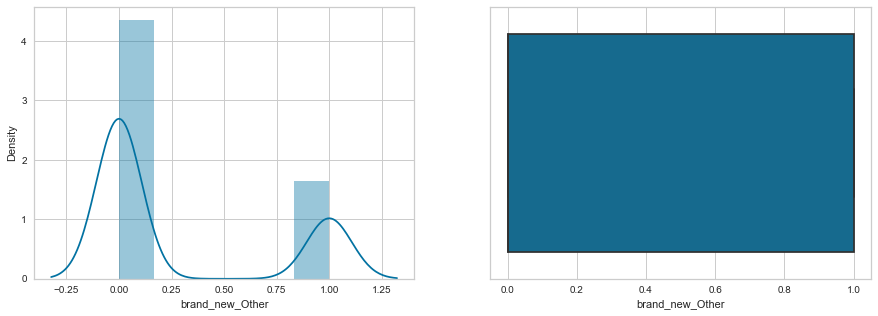

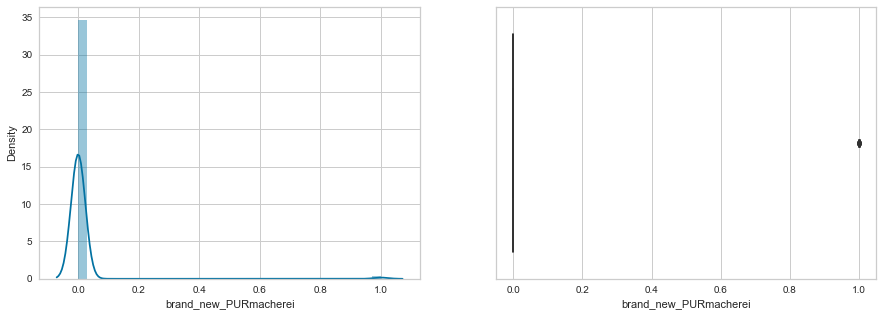

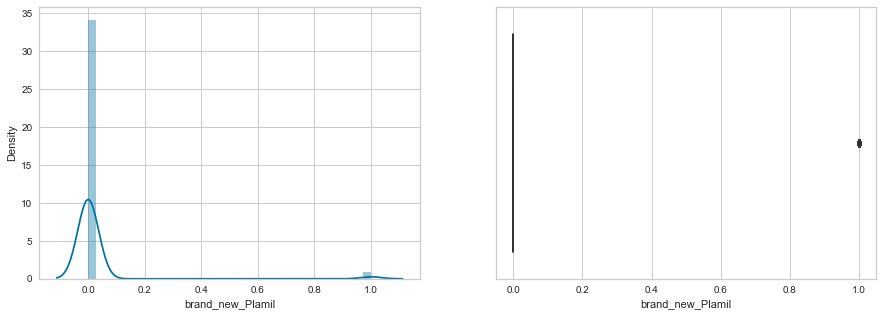

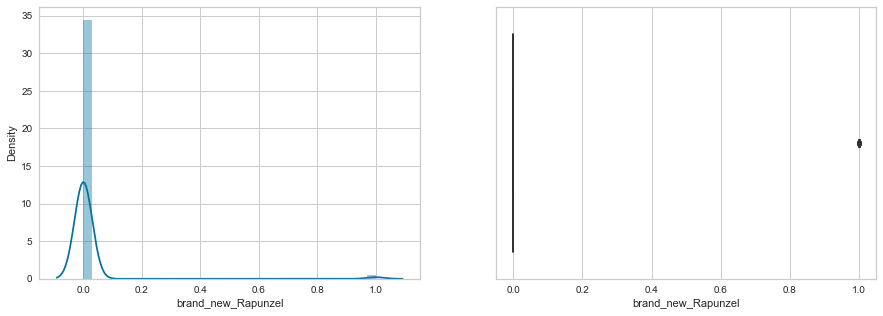

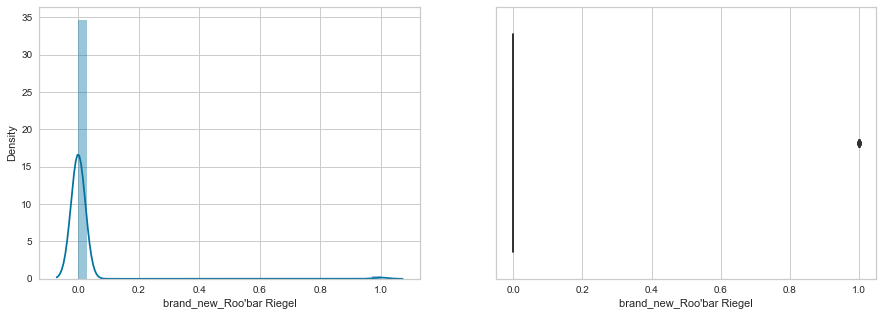

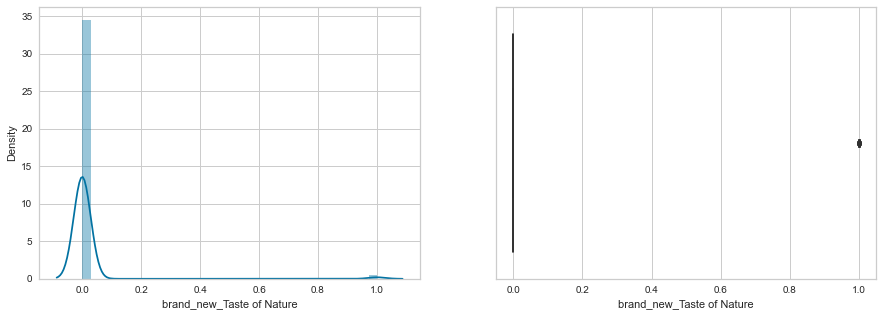

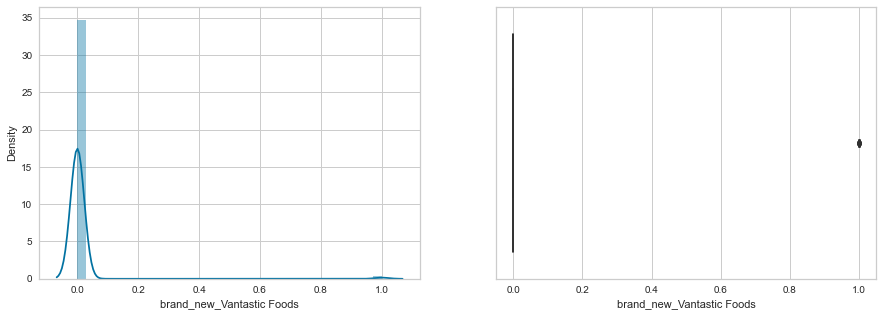

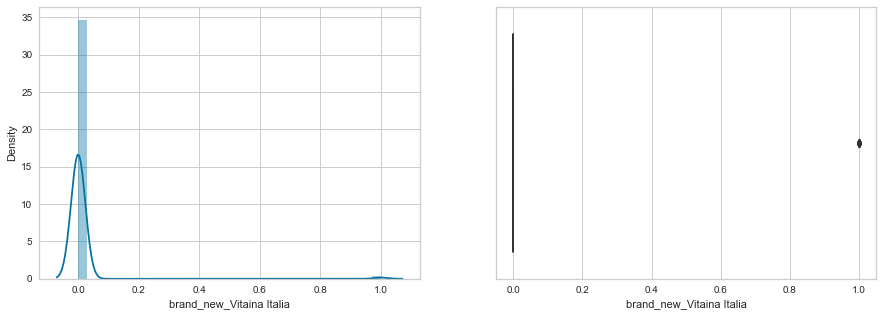

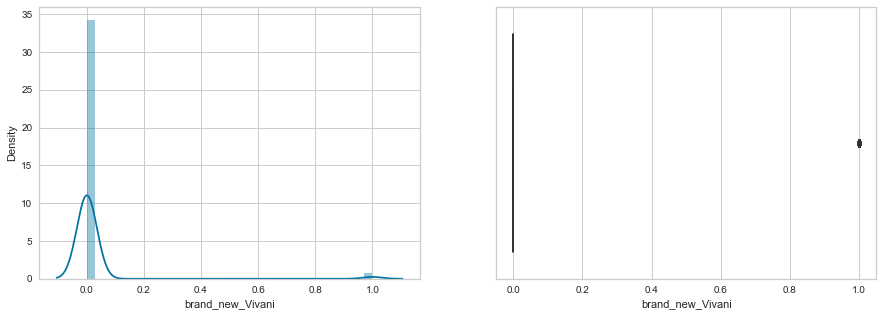

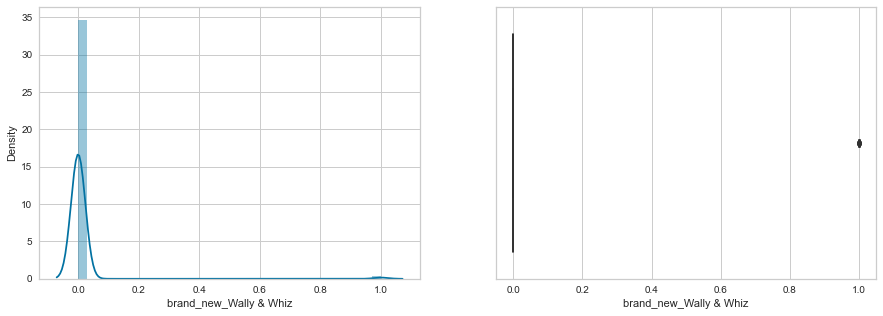

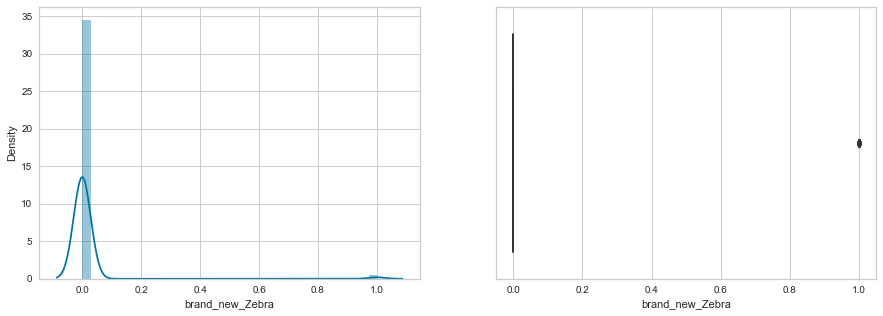

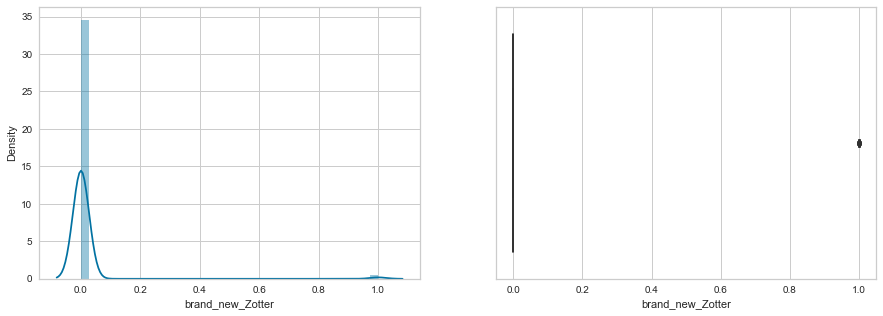

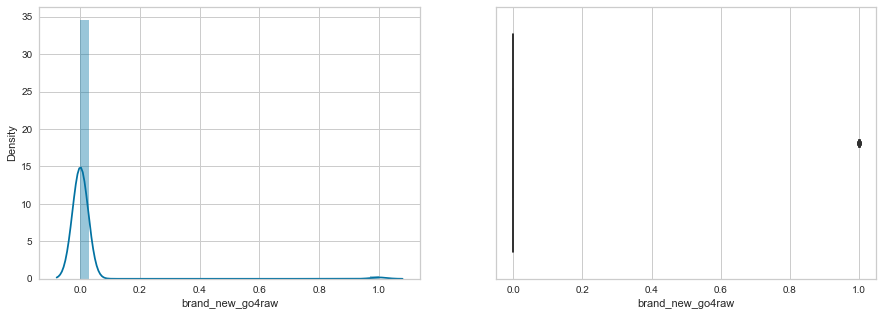

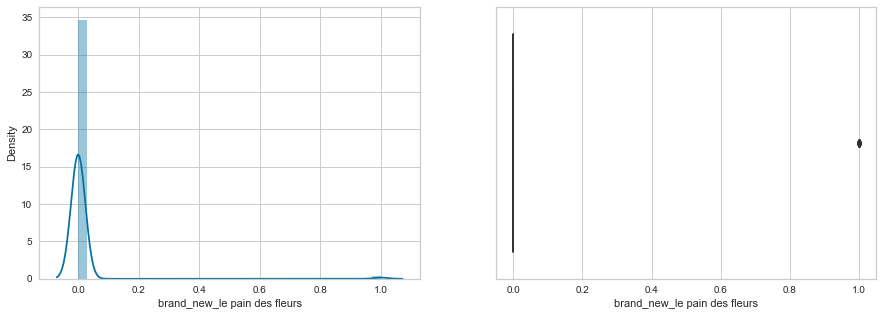

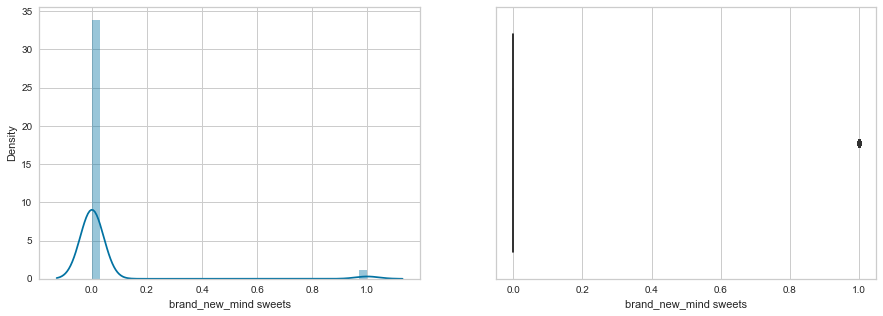

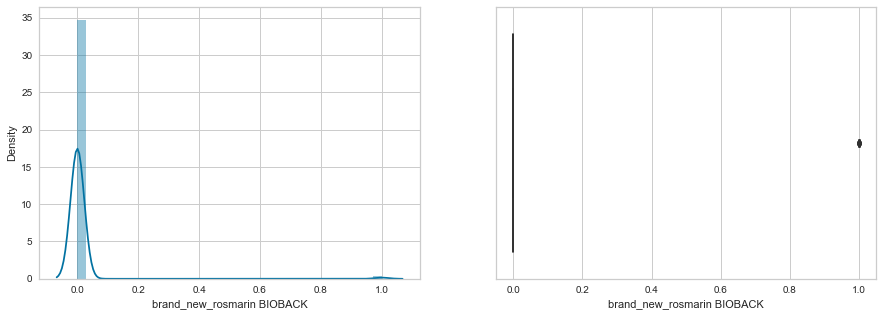

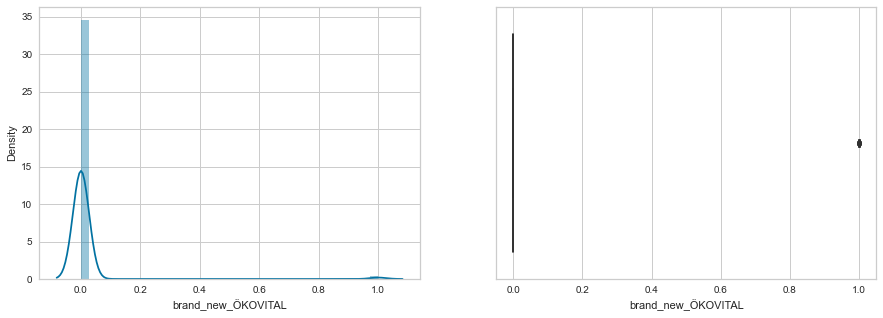

In [26]:
showing_dist_box(df_model)

### Scaling the data

In [27]:
df_model_sc = StandardScaler().fit_transform(df_model)
pd.DataFrame(df_model_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.824393,1.920951,-0.786445,-0.831300,-0.338529,-0.698729,2.374001,2.533067,-0.389985,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
1,1.824393,1.920951,0.829655,0.863320,1.218637,1.235795,-1.010864,-1.138195,-1.189500,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
2,1.824393,1.920951,-0.058665,-0.076184,0.180526,-0.053888,-0.710876,-0.932810,1.934797,1.510331,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
3,1.824393,1.920951,-0.773602,-0.822519,-0.396202,-0.859940,-1.260854,-1.240888,-1.389379,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
4,1.824393,1.920951,-0.291983,-0.313255,-0.626893,0.832769,-0.810872,1.788545,-1.189500,2.103745,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708


## New dataframe (less columns)

In [28]:
df_model_2 = df_model.copy()

In [29]:
df_model_2['price_weight'] = df_model_2['price'] / df_model_2['weight']
df_model_2['price_weight']

0       32.724138
1       32.724138
2       32.724138
3       32.724138
4       32.724138
          ...    
1227    50.000000
1228    50.000000
1229    50.000000
1230    17.000000
1231    17.000000
Name: price_weight, Length: 1232, dtype: float64

In [30]:
drop = ['price', 'weight', 'kj', 'brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', "brand_new_Lini's Bites", 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', "brand_new_Roo'bar Riegel",
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',
       'brand_new_ÖKOVITAL']
df_model_2 = df_model_2.drop(drop, axis=1)

In [31]:
df_model_2.head()

,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,price_weight
0,362.0,19.0,4.0,98.7,81.5,18.000000,25.45,4.5175,32.724138
1,555.0,46.0,28.0,31.0,10.0,10.000000,25.45,4.5175,32.724138
2,448.0,28.0,12.0,37.0,14.0,41.261905,21.00,4.5175,32.724138
3,363.0,18.0,2.0,26.0,8.0,8.000000,25.45,4.5175,32.724138
4,421.0,14.0,23.0,35.0,67.0,10.000000,25.45,4.5175,32.724138


In [33]:
df_model_sc_2 = StandardScaler().fit_transform(df_model_2)
pd.DataFrame(df_model_sc_2).head()

,0,1,2,3,4,5,6,7,8
0,-0.831300,-0.338529,-0.698729,2.374001,2.533067,-0.389985,2.103745,2.064515,-0.115831
1,0.863320,1.218637,1.235795,-1.010864,-1.138195,-1.189500,2.103745,2.064515,-0.115831
2,-0.076184,0.180526,-0.053888,-0.710876,-0.932810,1.934797,1.510331,2.064515,-0.115831
3,-0.822519,-0.396202,-0.859940,-1.260854,-1.240888,-1.389379,2.103745,2.064515,-0.115831
4,-0.313255,-0.626893,0.832769,-0.810872,1.788545,-1.189500,2.103745,2.064515,-0.115831


## Model building

### First run (k=3)

#### df_1

In [34]:
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=3, random_state=13)

In [35]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([2, 0, 0, ..., 2, 2, 2])

In [36]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    535
1     28
2    669
dtype: int64

In [37]:
# "performance metric"
kmeans.inertia_

51334.24610730049

#### df_2

In [38]:
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(df_model_sc_2)

KMeans(n_clusters=3, random_state=13)

In [39]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc_2)
clusters

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    252
1    568
2    412
dtype: int64

In [41]:
# "performance metric"
kmeans.inertia_

7252.412974645448

### Chosing the best k

#### Inertia

##### df_1

In [42]:
kmeans = KMeans(n_clusters=3, random_state=13, verbose=1, n_init=1)
kmeans.fit(df_model_sc)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 63033.10297679743
Iteration 1, inertia 53888.369846207206
Iteration 2, inertia 53852.28167110652
Converged at iteration 2: strict convergence.


53852.28167110652

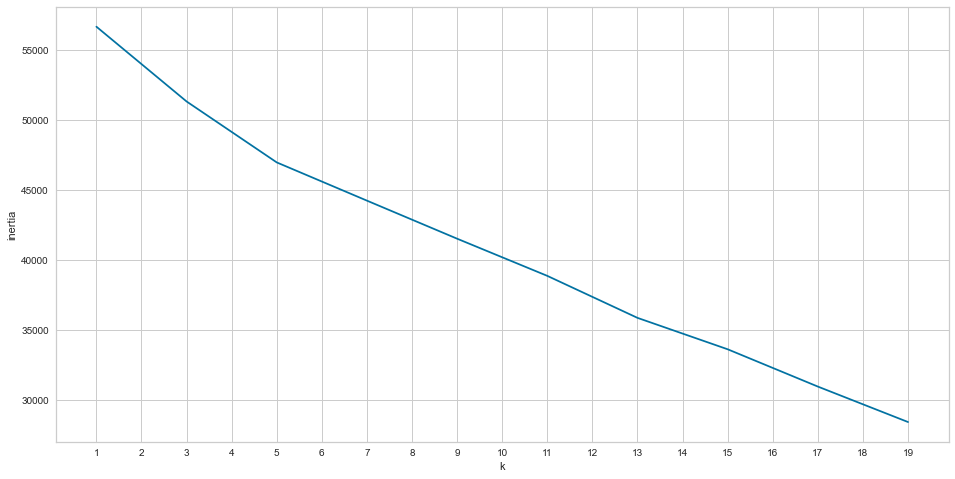

In [43]:
K = range(1, 20, 2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

##### df_2

In [44]:
kmeans = KMeans(n_clusters=3, random_state=13, verbose=1, n_init=1)
kmeans.fit(df_model_sc_2)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 10239.05844684508
Iteration 1, inertia 7571.682116544648
Iteration 2, inertia 7380.342490699244
Iteration 3, inertia 7287.637716087761
Iteration 4, inertia 7263.359360492225
Iteration 5, inertia 7256.328625712162
Iteration 6, inertia 7254.3295996205825
Iteration 7, inertia 7253.836724272525
Iteration 8, inertia 7252.484368311479
Iteration 9, inertia 7252.412974645448
Converged at iteration 9: strict convergence.


7252.412974645447

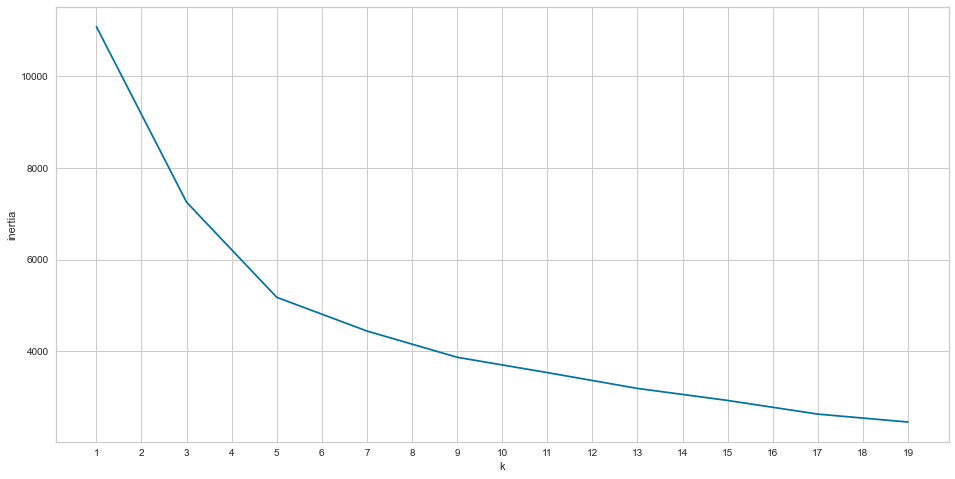

In [45]:
K = range(1, 20, 2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc_2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

#### Silhouette score

##### df_1

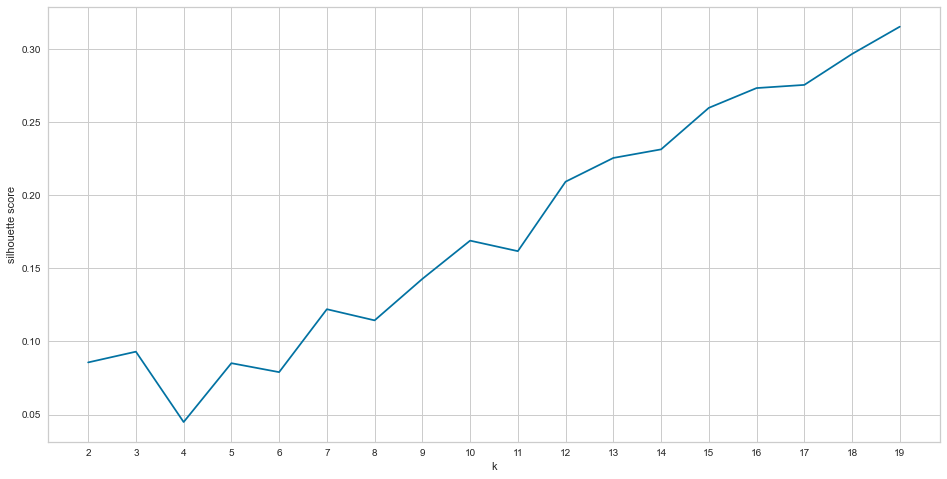

In [46]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    silhouette.append(silhouette_score(df_model_sc, kmeans.predict(df_model_sc)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

##### df_2

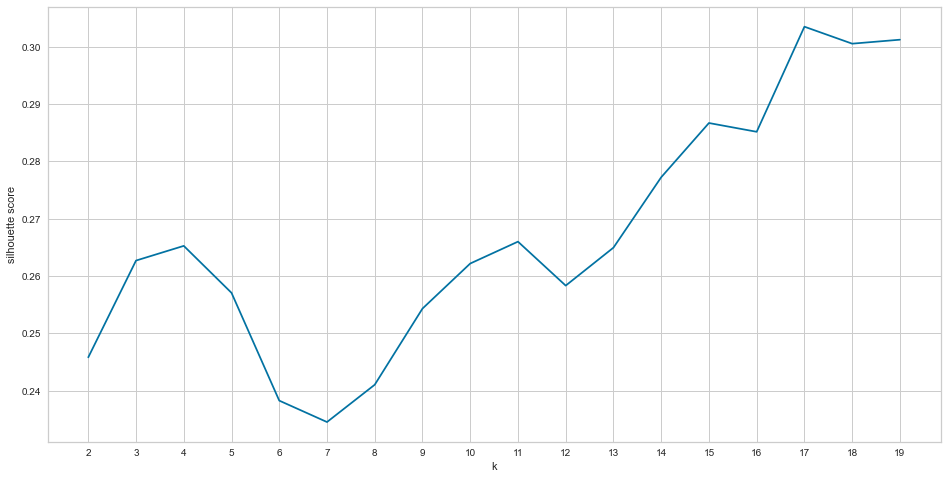

In [47]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc_2)
    silhouette.append(silhouette_score(df_model_sc_2, kmeans.predict(df_model_sc_2)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

#### Elbow method

##### df_1

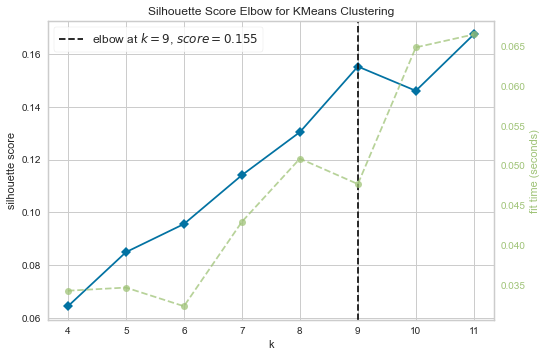

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(df_model_sc)
visualizer.show()

##### df_2

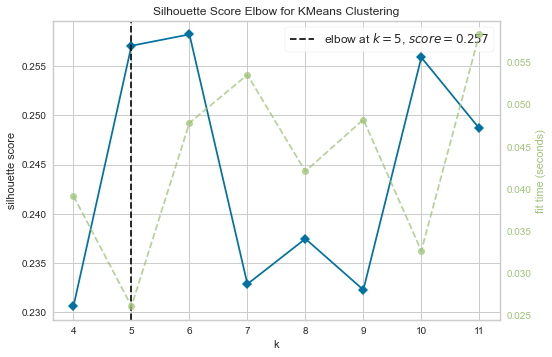

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(df_model_sc_2)
visualizer.show()

### Final models (k=9, k=5)

#### df_1

In [61]:
kmeans = KMeans(n_clusters=9, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=9, random_state=13)

In [62]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([3, 3, 3, ..., 0, 8, 8])

In [63]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    466
1     96
2    333
3    212
4     29
5     28
6     30
7     20
8     18
dtype: int64

In [64]:
# Explore the cluster assignment in the original dataset
df['cluster'] = clusters
df.sample(25)

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster,cluster_2
454,Schoko Schamane Meersalz,mind sweets,3.79,0.050,2439.0,587.0,41.0,25.5,47.6,38.3,NaN,6.5,1.10,https://kokku-online.de/mind-sweets-schoko-sch...,https://kokku-online.de//bilder/350x350/12143/...,mind sweets,2,2
1045,BIO Nut Butter Cup Salty Peanut,Foodist,2.50,0.030,2509.0,599.0,47.0,23.0,30.0,22.0,NaN,12.2,0.49,https://www.foodist.de/foodist-bio-nut-butter-...,https://foodist.imgix.net/media/image/42604537...,Foodist,1,2
831,BIO Dehydrierte Banane,Vitaina Italia,2.79,0.030,1294.0,308.0,0.6,0.0,65.0,58.0,12.0,4.7,0.30,https://www.foodist.de/vitaina-italia-bio-dehy...,https://foodist.imgix.net/media/image/Vitaina_...,Vitaina Italia,0,1
685,SchakaBerry,Vantastic Foods,3.29,0.100,2310.0,551.0,36.0,21.0,56.0,42.0,NaN,2.5,0.25,https://kokku-online.de/vantastic-foods-schaka...,https://kokku-online.de//bilder/350x350/9335/v...,Vantastic Foods,2,2
553,Dolmas Weinblätter gefüllt mit Reis,Rapunzel,4.29,0.280,707.0,169.0,7.7,1.1,20.1,3.3,NaN,2.9,1.50,https://kokku-online.de/rapunzel-dolmas-weinbl...,https://kokku-online.de//bilder/350x350/8560/r...,Rapunzel,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Eisbär °Lars° Marzipanfigur,rosmarin BIOBACK,3.79,0.045,1927.0,460.0,21.0,1.0,55.0,52.0,NaN,9.0,0.00,https://kokku-online.de/rosmarin-bioback-eisba...,https://kokku-online.de//bilder/350x350/17720/...,rosmarin BIOBACK,0,1
564,Energie Kugeln,Govinda,3.89,0.120,1403.0,335.0,11.3,1.0,52.7,49.0,NaN,4.4,NaN,https://kokku-online.de/govinda-energie-kugeln/,https://kokku-online.de//bilder/350x350/8407/g...,Other,0,1
513,Riegel °Sunflower & Sesam-Tahini°,go4raw,0.99,0.025,1885.0,449.0,17.5,2.3,57.0,26.0,NaN,12.3,0.02,https://kokku-online.de/go4raw-riegel-sunflowe...,https://kokku-online.de//bilder/350x350/10365/...,go4raw,0,1
816,Veganes Fruchtgummi - Moltebeere mit Brombeere,Wally & Whiz,8.50,0.140,1432.0,342.0,0.2,0.2,93.0,59.0,NaN,0.1,0.10,https://www.foodist.de/wally-whiz-veganes-fruc...,https://foodist.imgix.net/media/image/57134710...,Wally & Whiz,0,1


In [65]:
# "performance metric"
kmeans.inertia_

41539.11139222374

#### df_2

In [66]:
kmeans = KMeans(n_clusters=5, random_state=13)
kmeans.fit(df_model_sc_2)

KMeans(n_clusters=5, random_state=13)

In [67]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc_2)
clusters

array([3, 4, 4, ..., 2, 3, 3])

In [68]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    353
1      6
2    424
3    259
4    190
dtype: int64

In [69]:
# Explore the cluster assignment in the original dataset
df['cluster_2'] = clusters
df.sample(25)

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster,cluster_2
489,Fruchteis Kokos,smooze!,3.59,0.3250,662.0,158.0,7.90,7.00,20.8,16.7,NaN,0.80,0.12,https://kokku-online.de/smooze-fruchteis-kokos/,https://kokku-online.de//bilder/350x350/11411/...,Other,0,2
875,"BIO vegane Schokoladentafel ""Voll ohne Muh"" Ha...",MYLKCHOCY,3.50,0.0600,2776.0,667.0,58.00,38.00,27.0,22.0,NaN,7.60,0.09,https://www.foodist.de/mylkchocy-bio-vegane-sc...,https://foodist.imgix.net/media/image/40337730...,MYLKCHOCY,2,0
464,So Free Smooth Kakao & Kokos °zuckerreduziert°,Plamil,2.89,0.0800,2572.0,611.0,45.00,28.00,24.0,3.9,NaN,6.50,0.03,https://kokku-online.de/plamil-so-free-smooth-...,https://kokku-online.de//bilder/350x350/11932/...,Plamil,6,0
579,Raw Riegel Orange & Chia,go4raw,0.99,0.0250,1523.0,361.0,4.10,0.90,65.0,43.0,NaN,12.00,0.02,https://kokku-online.de/go4raw-raw-riegel-oran...,https://kokku-online.de//bilder/350x350/7907/g...,go4raw,0,3
743,Riegel °Kurkuma turmeric - Om!°,go4raw,0.99,0.0250,1650.0,393.0,13.01,2.68,48.0,39.0,NaN,16.81,0.02,https://kokku-online.de/go4raw-riegel-kurkuma-om/,https://kokku-online.de//bilder/350x350/10366/...,go4raw,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bio Veganer Proteinriegel Haselnuss,Koro,19.00,0.0432,1980.0,474.0,27.00,10.00,32.0,27.0,44.0,25.00,3.00,https://www.korodrogerie.de/bio-veganer-protei...,https://koro2.imgix.net/media/image/d7/62/fa/R...,Koro,3,4
448,Cashew Choc Crunch Riegel,Lini's Bites,2.49,0.0400,1860.0,445.0,23.00,11.60,48.0,29.0,NaN,8.00,0.46,https://kokku-online.de/linis-bites-cashew-cho...,https://kokku-online.de//bilder/350x350/19127/...,Lini's Bites,2,2
36,Bio Nut Butter Bar Tahin,Koro,12.00,0.0108,1819.0,435.0,24.00,33.00,39.0,18.0,16.0,15.00,1.00,https://www.korodrogerie.de/bio-nut-butter-bar...,https://koro2.imgix.net/media/image/bf/6e/b8/B...,Koro,3,0
893,Veganes Fruchtgummi - Moltebeere mit Brombeere,Wally & Whiz,8.50,0.1400,1432.0,342.0,0.20,0.20,93.0,59.0,NaN,0.10,0.10,https://www.foodist.de/wally-whiz-veganes-fruc...,https://foodist.imgix.net/media/image/57134710...,Wally & Whiz,0,3


In [70]:
# "performance metric"
kmeans.inertia_

5174.453872822885

## Saving dataframe with clusters

In [71]:
df.to_csv('df_clusters.csv')